Paul-Renaud Raymond

I'm presented with a dataset on Kansis City Housing statistics. 

The three main questions I'm interested in answering are:
1. Do any, and which, housing characteristics have a significant relationship with the price of a home?
2. Which model (or equation) would provide the most accurate predictions for the price of home given certain housing characteristics?
3. What available data or approaches would introduce greater precision in the predicition of home prices?

I think more insight to these questions would be valuable to many stakeholders including but not limited to homeowners, potential homebuyers, policy makers, and data enthusiasts who'd like to stop paying outrageous rent.

I'll get started on the analysis.

___Import All Packages___

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


___Load the Data File___

In [2]:
data = pd.read_csv("kc_house_data.csv")

___Inspect Dimensions___

In [3]:
data.shape

(21597, 21)

Observation: There are over 21K rows and 21 columns. Will keep this in mind when deciding how to address null values if any found in the data set.

___Inspect First 5 Rows___

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f4eca90>,
      dtype=object)

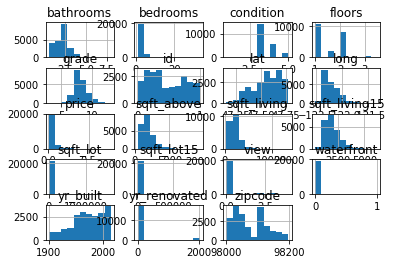

In [4]:
data.head()
data.hist()

Some initial observations: The file seems to have loaded correctly and most of the table appears to have non null values. Will explore the details further to assess the magnitude of missing values and to ensure that predictors have the correct data types.

Inspect the columns in the file for type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


___Remove Columns___

Relative to __long__ and __lat__, __zipcode__ has much less unique columns. Since I believe there's considerable association between zipcode and geolocator, I will delete the __long__ and __lat__ columns

In [6]:
#corr_check = pd.DataFrame[data("zipcode","long")]
#confirm high correlation among zipcode and long/lat

In [7]:
data = data.drop(['long','lat'], 1)

I'll now take a look at the summary statistics of the dataset.

In [8]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

       sqft_living15     sqft_lot15  
count   21597.000000   21597.000000  
mean     1986.620318   12758.283512  
std       685.230472   27274.441950  
min       399.000000     651.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7620.000000  
75%      2360.000000   10083.000000  
max      6210.000000  871200.000000

__"id"__ is interesting. I would expect each entry to have a unique identification; that does not appear to be the case. I'll investigate with __value_counts__.

In [9]:
data.id.value_counts().unique()

array([3, 2, 1])

Some of the IDs appear twice. Let me confirm that these are not duplicates.

Digging into one of the IDs that appeared twice:

In [10]:
data.loc[data.id == 1788900230]

id       date     price  bedrooms  bathrooms  sqft_living  \
13743  1788900230  7/22/2014   86500.0         3        1.0          840   
13744  1788900230   4/3/2015  199950.0         3        1.0          840   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
13743      9480     1.0         0.0   0.0          3      6         840   
13744      9480     1.0         0.0   0.0          3      6         840   

      sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  \
13743           0.0      1960           0.0    98023            840   
13744           0.0      1960           0.0    98023            840   

       sqft_lot15  
13743        9420  
13744        9420

Seems like the same home with two different transactions. I won't remove ID multiples since both transactions are important pieces of information. Additionally, since ID should not be a strong independent variable, I won't focus on updating the column (i.e ID1A, ID1B) to differentiate among transactions.

This observation does highlight the importance of time period, or specically with our data, the __"date"__ predictor. As a first pass model, I will take a general approach by not accounting for timeseries. Therefore I'll also drop the __"date"__ column.

In [11]:
data = data.drop('date', 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(1)
memory usage: 3.0+ MB


Although there could be considerable variance in saleprice for the same home, keeping all values could provide more accuracy given the cyclical nature of real estate.

I'll next look into null values and decide a course of action if any are indeed present.

___Summarize the Total Number of Null Values___

In [12]:
data.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

__"waterfront"__ and __"yr_renovated"__ both have a considerable amount of null values. __"view"__ also has some null values. I will decide how to address this later in the data transformation process.

___Choose EDA Framework___

At this point, I will decide which data science framework to use in the process of completing the project. Among the three approaches (__CRISP-DM, KDD, OSEMIn__), I will start with the OSEMN framework since it is fairly straightforward. I have already completed the first step: __Obtaining the Data__. I'm left with __Scrubbing the Data__, __Exploring the Data__, __Creating a Model__, and finally __Interpreting the Results__ that are meaningful to stakeholders.

There are several predictors to convert in the __Scrub__ phase. I'll start on that next.

A number of predictors should be converted to strings although they contain numbers, because they essentially represent discrete values or categories. Moreover, having these categories as integers or floats can invite the risk of unintended & invalid mathematical operations.

___Convert Predictors___

In [13]:
data.bathrooms = data.bathrooms.astype("str")
data.bedrooms = data.bedrooms.astype("str")
data.view = data.view.astype("str")
data.grade = data.grade.astype("str")
data.zipcode = data.zipcode.astype("str")
data.condition = data.condition.astype("str")
data.yr_built = data.yr_built.astype("str")
data.floors = data.floors.astype("str")
data.waterfront = data.waterfront.astype("str")
# data.yr_built = data.yr_built.astype("str")
# data.yr_renovated = data.yr_renovated.astype("str")
data.describe()

id         price   sqft_living      sqft_lot    sqft_above  \
count  2.159700e+04  2.159700e+04  21597.000000  2.159700e+04  21597.000000   
mean   4.580474e+09  5.402966e+05   2080.321850  1.509941e+04   1788.596842   
std    2.876736e+09  3.673681e+05    918.106125  4.141264e+04    827.759761   
min    1.000102e+06  7.800000e+04    370.000000  5.200000e+02    370.000000   
25%    2.123049e+09  3.220000e+05   1430.000000  5.040000e+03   1190.000000   
50%    3.904930e+09  4.500000e+05   1910.000000  7.618000e+03   1560.000000   
75%    7.308900e+09  6.450000e+05   2550.000000  1.068500e+04   2210.000000   
max    9.900000e+09  7.700000e+06  13540.000000  1.651359e+06   9410.000000   

       yr_renovated  sqft_living15     sqft_lot15  
count  17755.000000   21597.000000   21597.000000  
mean      83.636778    1986.620318   12758.283512  
std      399.946414     685.230472   27274.441950  
min        0.000000     399.000000     651.000000  
25%        0.000000    1490.000000    5100.000000  
50%        0.000000    1840.000000    7620.000000  
75%        0.000000    2360.000000   10083.000000  
max     2015.000000    6210.000000  871200.000000

I encountered an issue converting "sqft_basement" into a float. After additional inspection of the error note, I notice non-numnerical values that can't be converted.
Performing value_counts indicates that there are 454 occurances of "?", likely due to missing values, since there are also many occurences of "0" (or no basement in the home). My initial thought is to eliminate these rows given the relatively small percentage of rows but I'd like to compare the descriptive summary of this set to the overall descriptive summary to ensure minimal impact.

In [14]:
data_check = data.loc[data.sqft_basement == "?"]

In [15]:
data_check.describe()

id         price  sqft_living       sqft_lot   sqft_above  \
count  4.540000e+02  4.540000e+02   454.000000     454.000000   454.000000   
mean   4.555794e+09  5.303233e+05  2052.431718   15670.872247  1766.607930   
std    2.898736e+09  3.330030e+05   897.855170   50029.197716   797.471819   
min    1.120040e+07  1.025000e+05   600.000000     681.000000   600.000000   
25%    2.066505e+09  3.207500e+05  1430.000000    5000.000000  1162.500000   
50%    3.883402e+09  4.570000e+05  1900.000000    7200.000000  1595.000000   
75%    7.235076e+09  6.495000e+05  2510.000000   10481.000000  2180.000000   
max    9.834200e+09  3.420000e+06  6930.000000  881654.000000  5450.000000   

       yr_renovated  sqft_living15     sqft_lot15  
count    366.000000     454.000000     454.000000  
mean     114.273224    1956.299559   13659.028634  
std      463.833410     664.449227   31810.906918  
min        0.000000     740.000000     977.000000  
25%        0.000000    1490.000000    5000.000000  
50%        0.000000    1800.000000    7211.000000  
75%        0.000000    2337.500000    9902.250000  
max     2014.000000    4560.000000  438213.000000

The two tables look consistent. If possible a joint plot with the two sets could be helpful to make a more accurate determination, visually. I'll move forward with removing these rows and completing the conversion of __sqft_basment__ to a float.

In [16]:
data = data.drop(data[data['sqft_basement']=="?"].index)

In [17]:
data.sqft_basement = data.sqft_basement.astype("float")

___Address Nulls___

In [18]:
data.waterfront.isna().sum()

0

__"waterfront"__, __"view"__, and __"yr_renovated"__ are each categorical data. It could make sense for these predictors to have null values, however, these predictors also have a "0" values which indicates no renovation or waterfront. Therefore it makes sense for now to remove rows with null values since at worst case, the nulls for both predictors can only account for ~25% of the data set.

In [19]:
# data.waterfront.dropna(inplace=True)
# data.yr_renovated.dropna(inplace=True)
# data.view              .dropna(inplace=True)
# data.waterfront.isna().sum()
## Initially tried to drop rows individually by predictor but found that the following is appropriate command 
data.dropna(inplace=True)

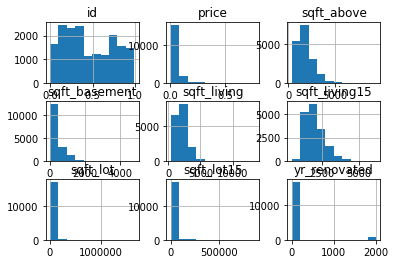

In [20]:
data.hist();

___Decide Which Columns to Keep___

We learned that multicolinearity can be an issue with regression models. I would like to explore the relationships among predictors, noting high correlation between particular predictors, and then deciding which columns to drop before the modeling step.

I will create a heatmap to help quickly identify problematic predictors.

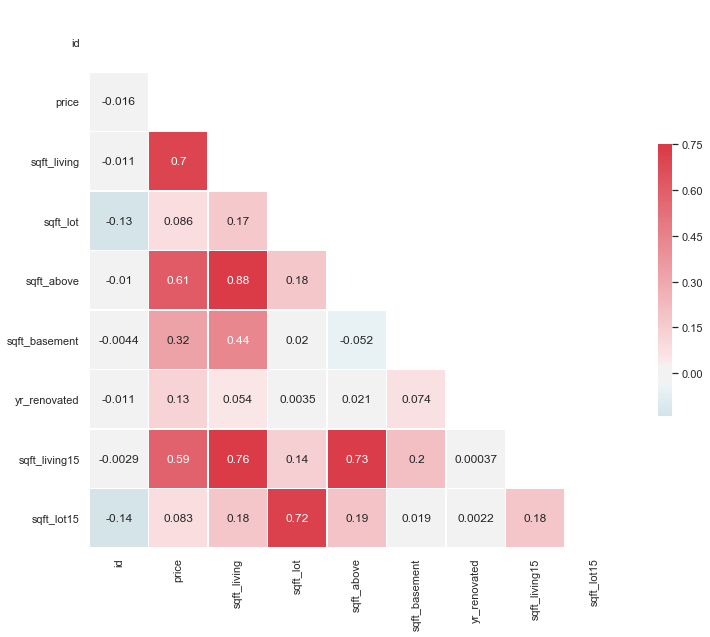

In [21]:
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.75, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

The shades of red indicate some strong association between predictors. I'll use correlation of .75 as threshold for which predictors to remove if it appears more than once for a particular predictor.

Using this rubric, I'll remove __"sqft_living"__ given its high association with __"sqft_living15"__ and __"sqft_above"__.

In [22]:
data.drop(columns="sqft_living", inplace=True)

In [23]:
data.shape

(17389, 17)

___Check for Normality___

A key assumption in our model is that the sample of data used is normally distributed, or represents the distribution that one would find in the general population. This assumption is applied to the distribution of our predictor variables. Yet, this extension of the assumption of normal distribution is not always true for specific predictors. 

I'll explore the data, specifically the distribution of numerical predictor values to assess their respective distributions.

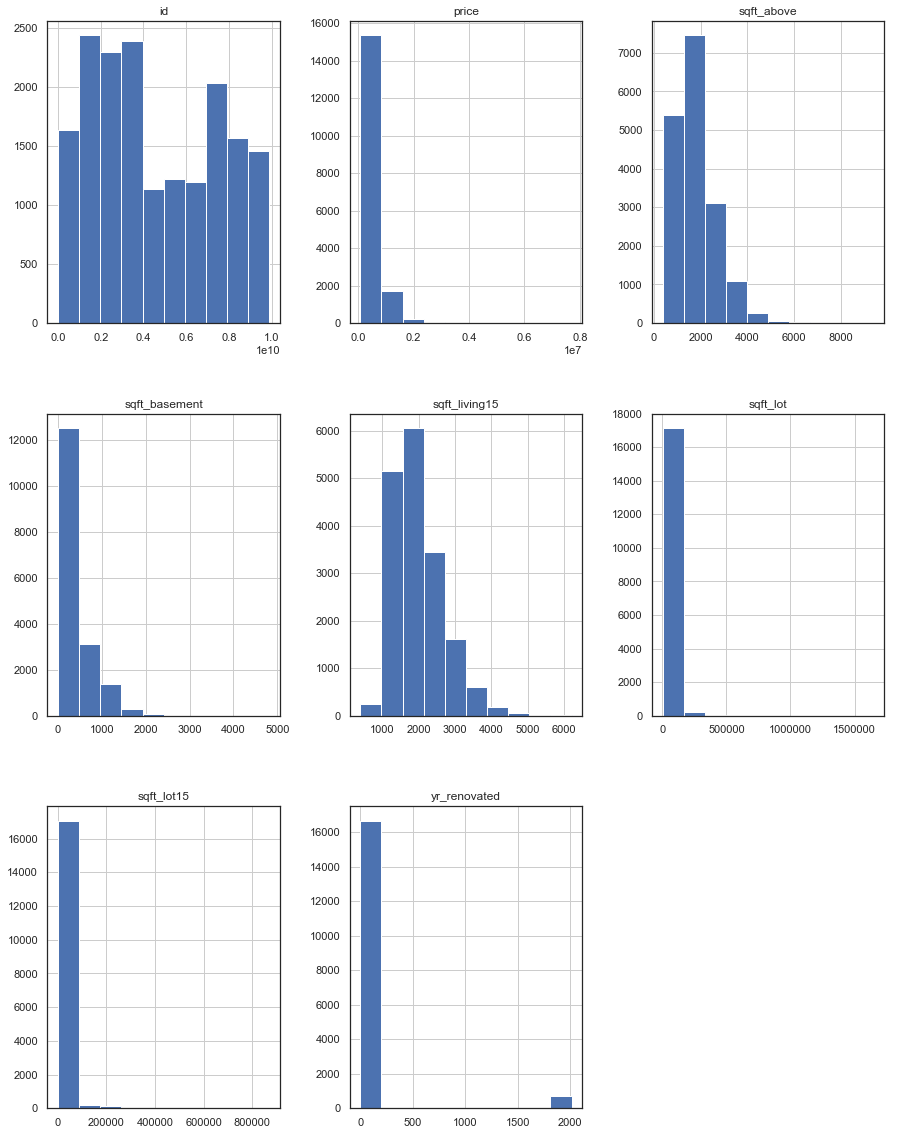

In [24]:
data.hist(figsize=(15,20));

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


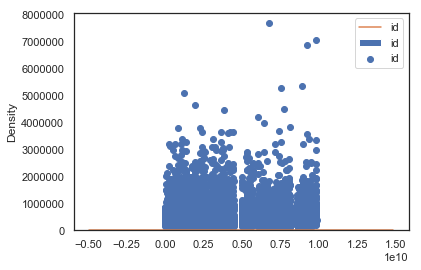

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


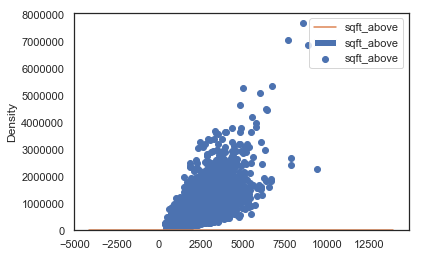

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


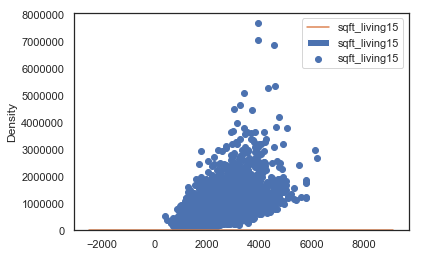

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


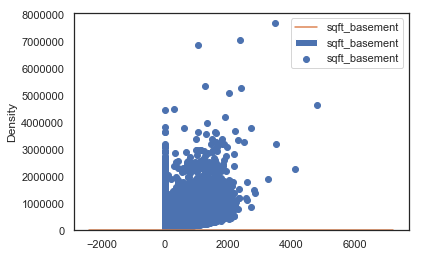

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


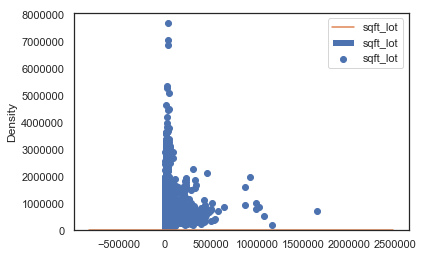

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


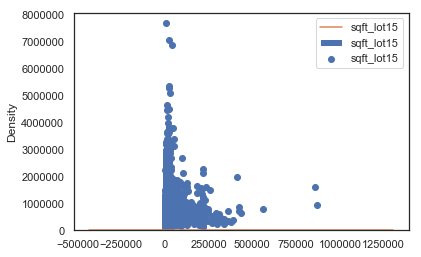

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


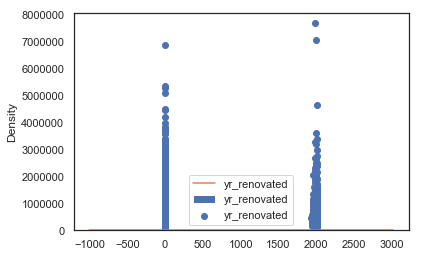

In [25]:
for column in ['id','sqft_above','sqft_living15','sqft_basement','sqft_lot','sqft_lot15','yr_renovated']:
    data[column].plot.hist(normed=True)
    data[column].plot.kde(label=column)
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

Upon observation, most of the distributions display skewness. __"id"__ has a bimodal distribution likely due to the resales of homes in 2015.

Initial thought is to perfrom log transformations on the __sqft_lot15__, __sqft_lot__, __sqft_living15__, __sqft_above__, __price__, __long__, __lat__, and __id__. However, negative or predominately zero values can have adverse effect on results. I'll first complete a regression for initial view of results. After, I'll likely consider scaling to improve my results. If a log transformation can then be helpful, I'll replace any negative values with a small positive integer, perform the log transformations, and rerun my regressions.

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kansas City Real Estate: price~id
------------------------------


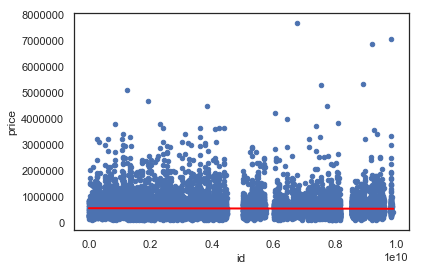

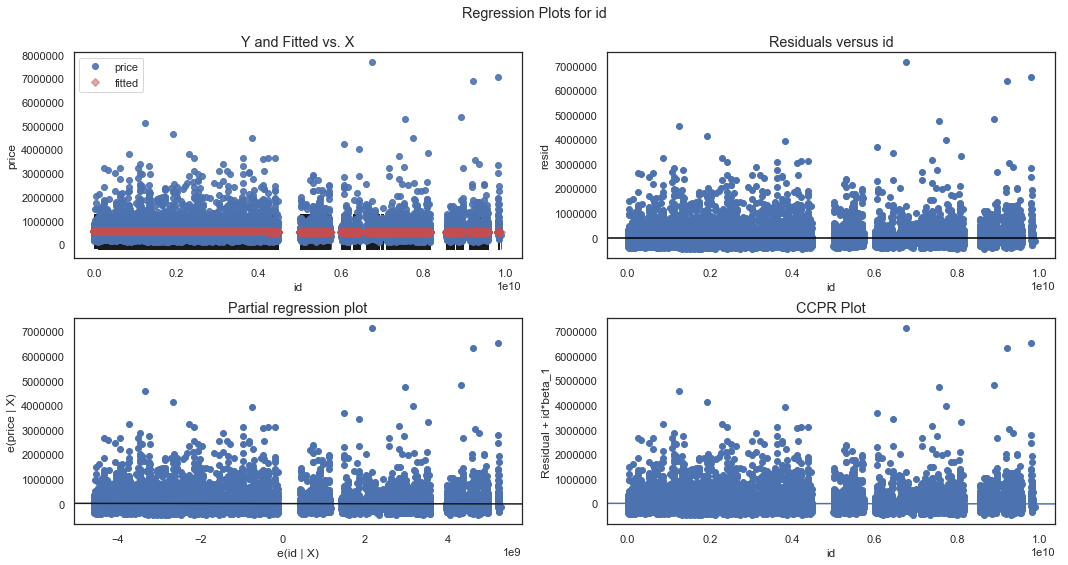

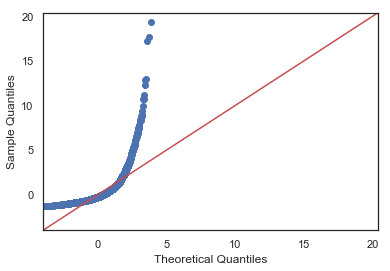

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['id', 0.0002697668689333188, 550638.5237587796, -2.1140763812569305e-06, 0.030322153373274784]
Kansas City Real Estate: price~sqft_above
------------------------------


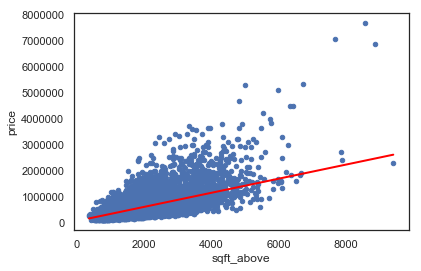

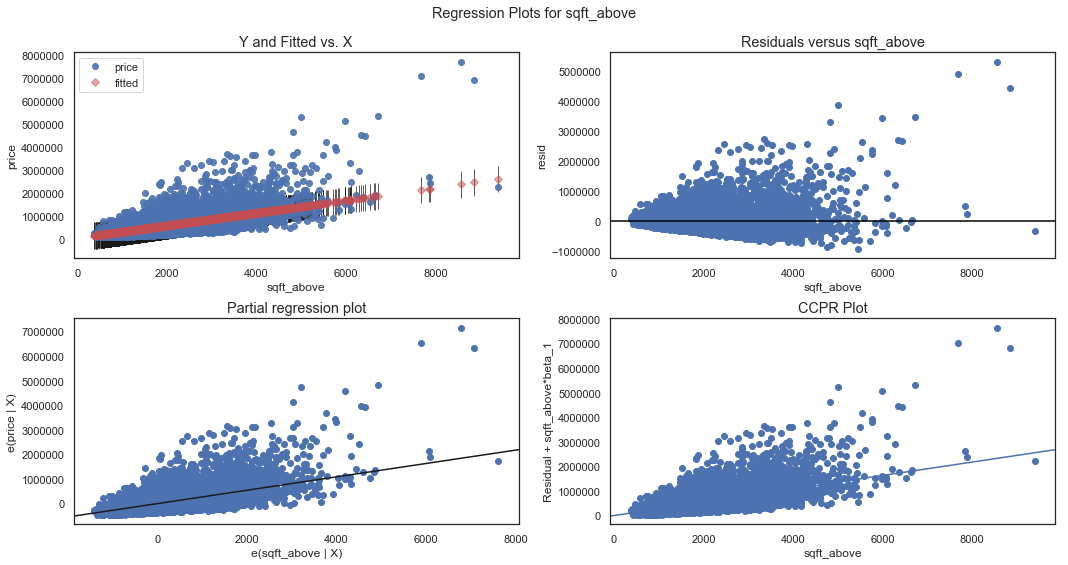

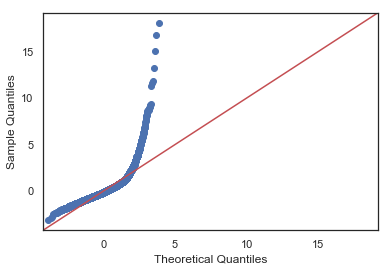

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['sqft_above', 0.36959712616326057, 53603.070617417776, 271.88494059919265, 0.0]
Kansas City Real Estate: price~sqft_living15
------------------------------


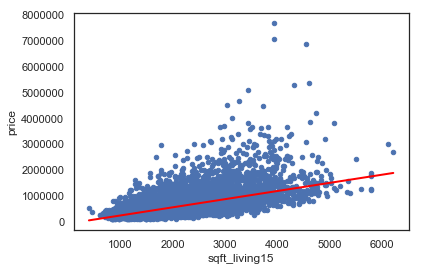

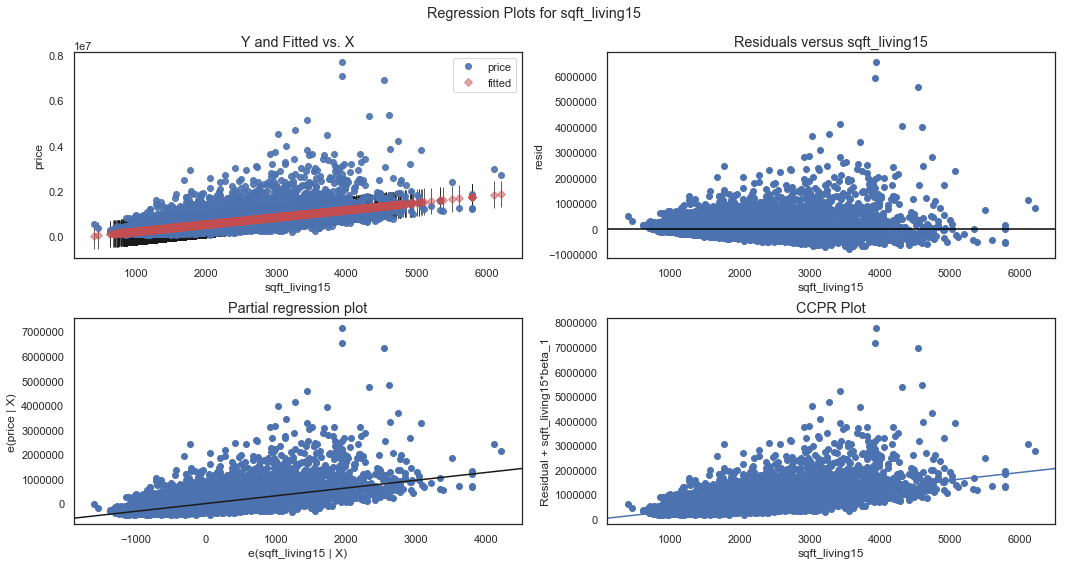

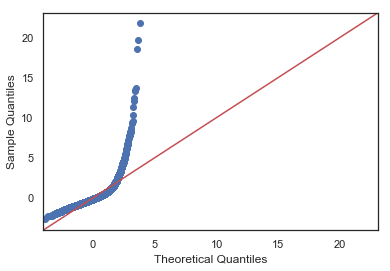

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['sqft_living15', 0.343343262590601, -88675.5279791273, 316.27098930894203, 0.0]
Kansas City Real Estate: price~sqft_basement
------------------------------


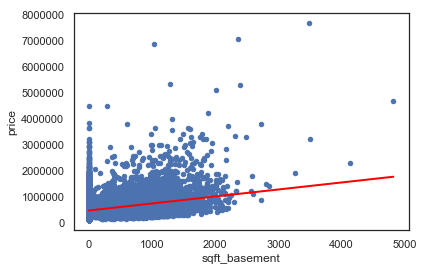

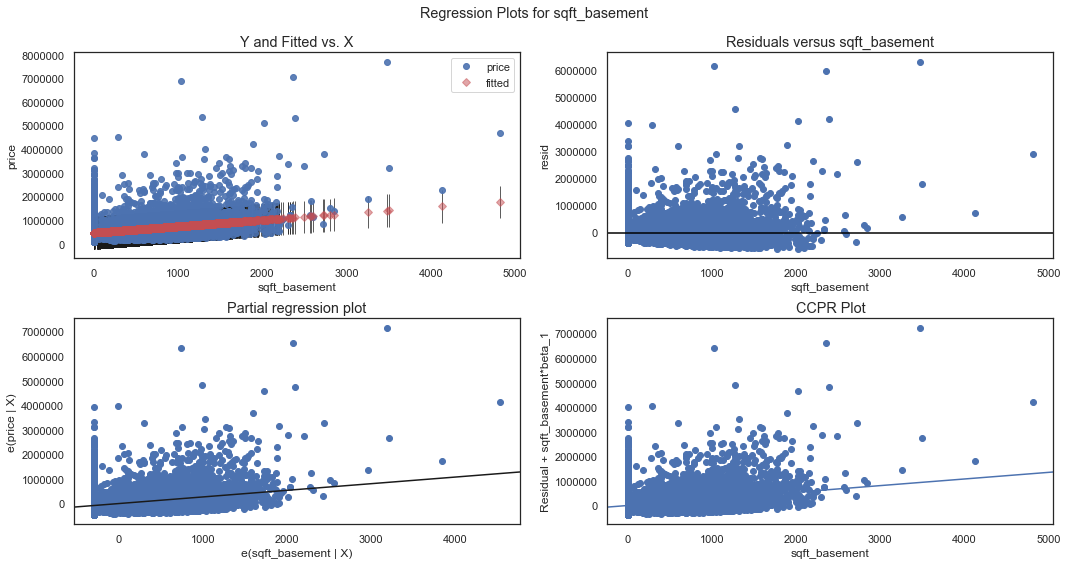

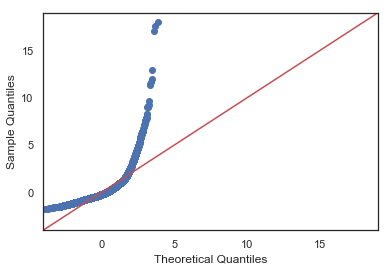

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['sqft_basement', 0.10457993320531522, 461944.91857656196, 269.68612819768106, 0.0]
Kansas City Real Estate: price~sqft_lot
------------------------------


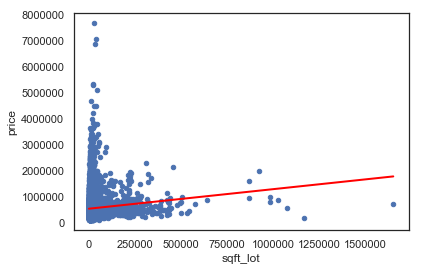

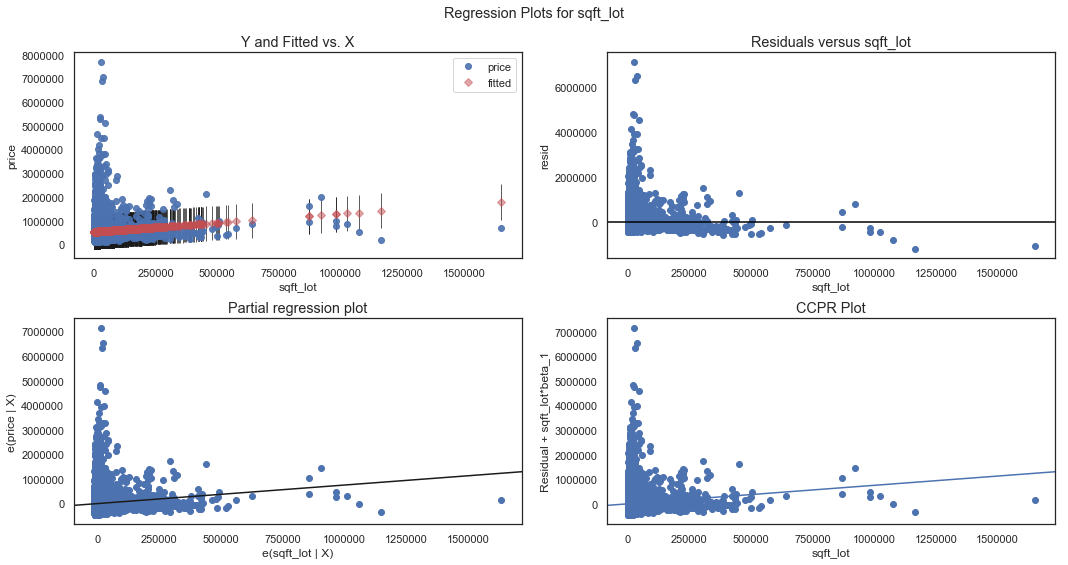

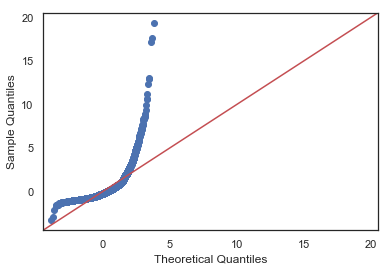

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['sqft_lot', 0.007422450776853107, 529412.832343277, 0.75387645734065, 5.1879636367521685e-30]
Kansas City Real Estate: price~sqft_lot15
------------------------------


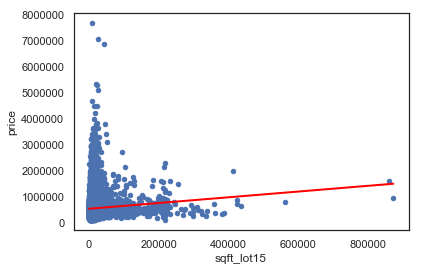

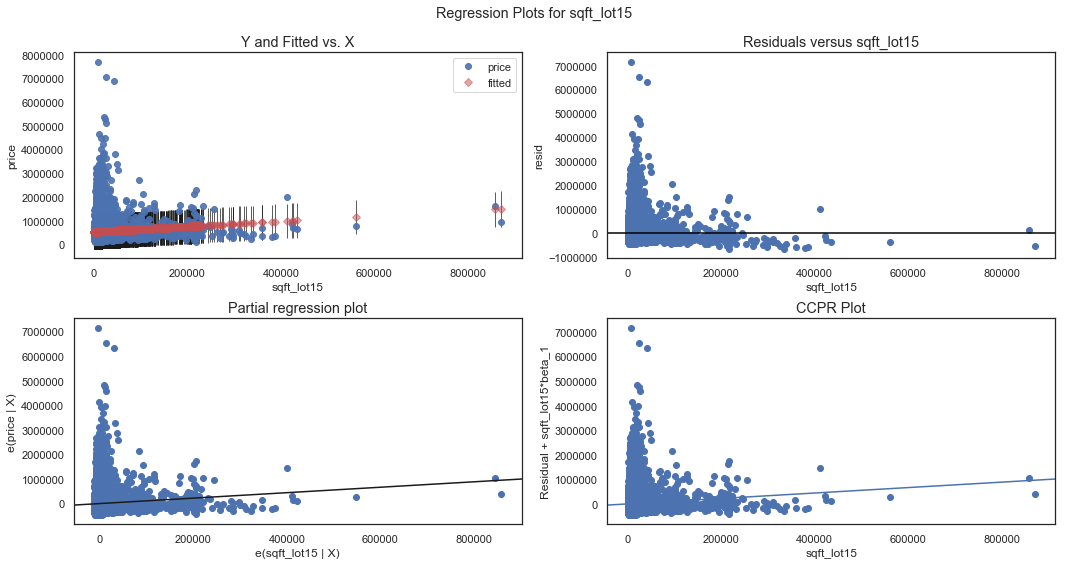

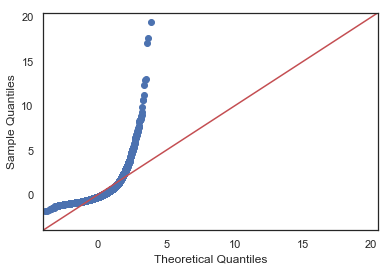

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['sqft_lot15', 0.006807302274587146, 526722.7094505272, 1.107973974293615, 1.1820903393164722e-27]
Kansas City Real Estate: price~yr_renovated
------------------------------


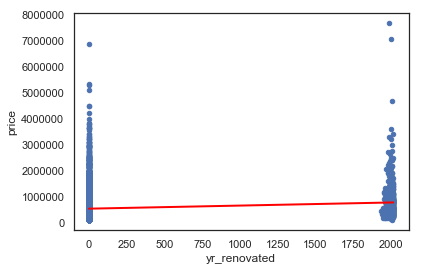

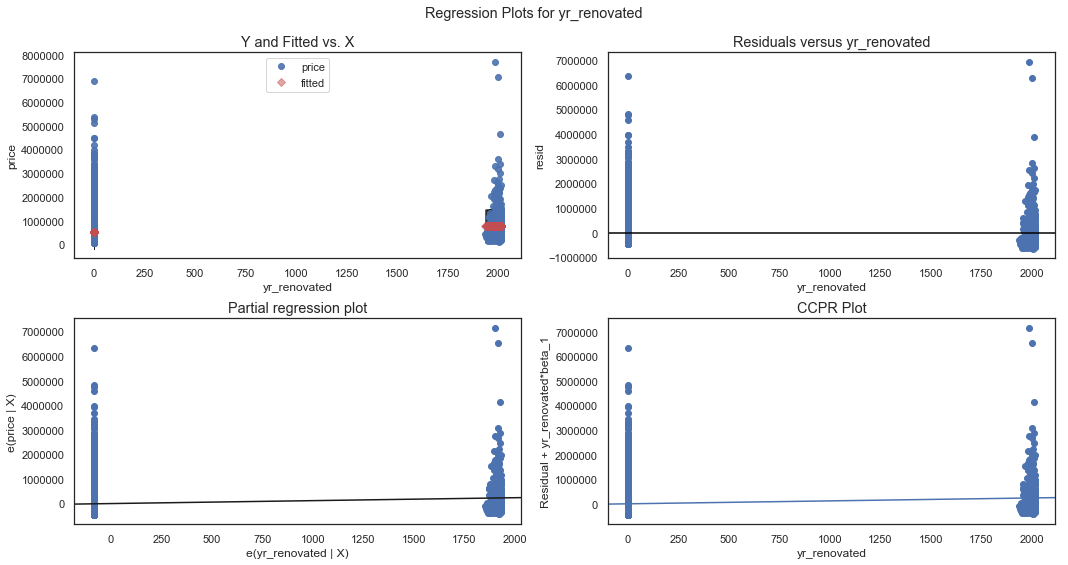

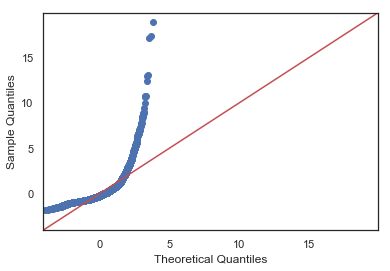

['yr_renovated', 0.016442251014418763, 531057.1735947697, 119.11334005513598, 1.1966856995646673e-64]


In [27]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'normality(JB)']]
for idx, val in enumerate(['id','sqft_above','sqft_living15','sqft_basement','sqft_lot','sqft_lot15','yr_renovated']):
    print ("Kansas City Real Estate: price~" + val)
    print ("------------------------------")
    
    f = "price~" + val
    model = smf.ols(formula=f, data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]})
    preds = model.predict(X_new)
    data.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx + 1])

None of the numeric predictors have a strong r-squared value. I will contine to pre-process the data through log transformation and feature scaling.

In [28]:
data.yr_renovated = data.yr_renovated.astype('category')
data.sqft_basement = data.sqft_basement.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 17 columns):
id               17389 non-null int64
price            17389 non-null float64
bedrooms         17389 non-null object
bathrooms        17389 non-null object
sqft_lot         17389 non-null int64
floors           17389 non-null object
waterfront       17389 non-null object
view             17389 non-null object
condition        17389 non-null object
grade            17389 non-null object
sqft_above       17389 non-null int64
sqft_basement    17389 non-null int64
yr_built         17389 non-null object
yr_renovated     17389 non-null category
zipcode          17389 non-null object
sqft_living15    17389 non-null int64
sqft_lot15       17389 non-null int64
dtypes: category(1), float64(1), int64(6), object(9)
memory usage: 2.3+ MB


I'll check for negative values

In [29]:
data.describe()

id         price      sqft_lot    sqft_above  sqft_basement  \
count  1.738900e+04  1.738900e+04  1.738900e+04  17389.000000   17389.000000   
mean   4.586354e+09  5.409426e+05  1.529400e+04   1792.447754     292.924608   
std    2.875821e+09  3.701590e+05  4.230208e+04    827.689446     443.868013   
min    1.000102e+06  8.000000e+04  5.200000e+02    370.000000       0.000000   
25%    2.126049e+09  3.215000e+05  5.047000e+03   1200.000000       0.000000   
50%    3.905010e+09  4.500000e+05  7.620000e+03   1560.000000       0.000000   
75%    7.325600e+09  6.450000e+05  1.067700e+04   2220.000000     560.000000   
max    9.895000e+09  7.700000e+06  1.651359e+06   9410.000000    4820.000000   

       sqft_living15     sqft_lot15  
count   17389.000000   17389.000000  
mean     1990.755305   12834.157398  
std       685.793217   27564.253556  
min       399.000000     659.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7624.000000  
75%      2370.000000   10091.000000  
max      6210.000000  871200.000000

I replaced the zeros in __sqft_basement__ with the mean to avoid previous log(0) error and ensure more normal distribution

In [30]:
data.sqft_basement = data.sqft_basement.replace(0.0, data.sqft_basement.mean())

In [31]:
data.describe()

id         price      sqft_lot    sqft_above  sqft_basement  \
count  1.738900e+04  1.738900e+04  1.738900e+04  17389.000000   17389.000000   
mean   4.586354e+09  5.409426e+05  1.529400e+04   1792.447754     470.576164   
std    2.875821e+09  3.701590e+05  4.230208e+04    827.689446     336.772056   
min    1.000102e+06  8.000000e+04  5.200000e+02    370.000000      10.000000   
25%    2.126049e+09  3.215000e+05  5.047000e+03   1200.000000     292.924608   
50%    3.905010e+09  4.500000e+05  7.620000e+03   1560.000000     292.924608   
75%    7.325600e+09  6.450000e+05  1.067700e+04   2220.000000     560.000000   
max    9.895000e+09  7.700000e+06  1.651359e+06   9410.000000    4820.000000   

       sqft_living15     sqft_lot15  
count   17389.000000   17389.000000  
mean     1990.755305   12834.157398  
std       685.793217   27564.253556  
min       399.000000     659.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7624.000000  
75%      2370.000000   10091.000000  
max      6210.000000  871200.000000

In [32]:
data_log = pd.DataFrame([])
data_log["logprice"]=np.log(data["price"])
data_log["logsqft_above"]=np.log(data["sqft_above"])
data_log["logsqft_lot15"]=np.log(data["sqft_lot15"])
data_log["logsqft_living15"]=np.log(data["sqft_living15"])
data_log["logsqft_lot"]=np.log(data["sqft_lot"])
data_log["logsqft_basement"]=np.log(data["sqft_basement"])

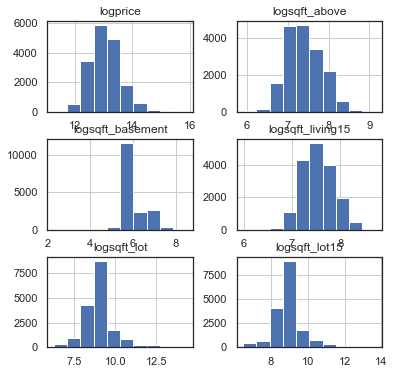

In [33]:
data_log.hist(figsize = [6,6]);

Next, I'll scale these continuous predictors and target feature

In [34]:
data_log.logsqft_above = (data_log.logsqft_above - data_log.logsqft_above.mean()) / data_log.logsqft_above.std()
data_log.logsqft_lot15 = (data_log.logsqft_lot15 - data_log.logsqft_lot15.mean()) / data_log.logsqft_lot15.std()
data_log.logsqft_lot = (data_log.logsqft_lot - data_log.logsqft_lot.mean()) / data_log.logsqft_lot.std()
data_log.logsqft_basement = (data_log.logsqft_basement - data_log.logsqft_basement.mean()) / data_log.logsqft_basement.std()
# data_log.logyr_renovated = (data_log.logyr_renovated - data_log.logyr_renovated.mean()) / data_log.logyr_renovated.std()
data_log.logsqft_living15 = (data_log.logsqft_living15 - data_log.logsqft_living15.mean()) / data_log.logsqft_living15.std()
data_log.logprice = (data_log.logprice - data_log.logprice.mean()) / data_log.logprice.std()

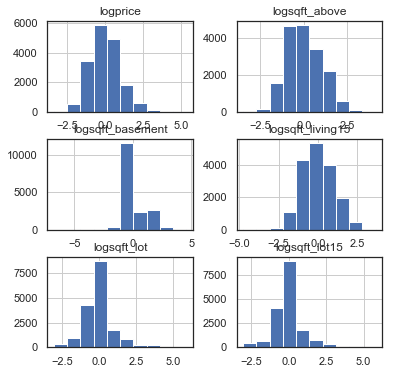

In [35]:
data_log.hist(figsize=(6,6));

I'll rerun the regression for data_log

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Kansas City Real Estate: logprice~logsqft_above
------------------------------


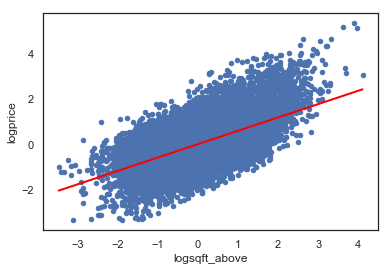

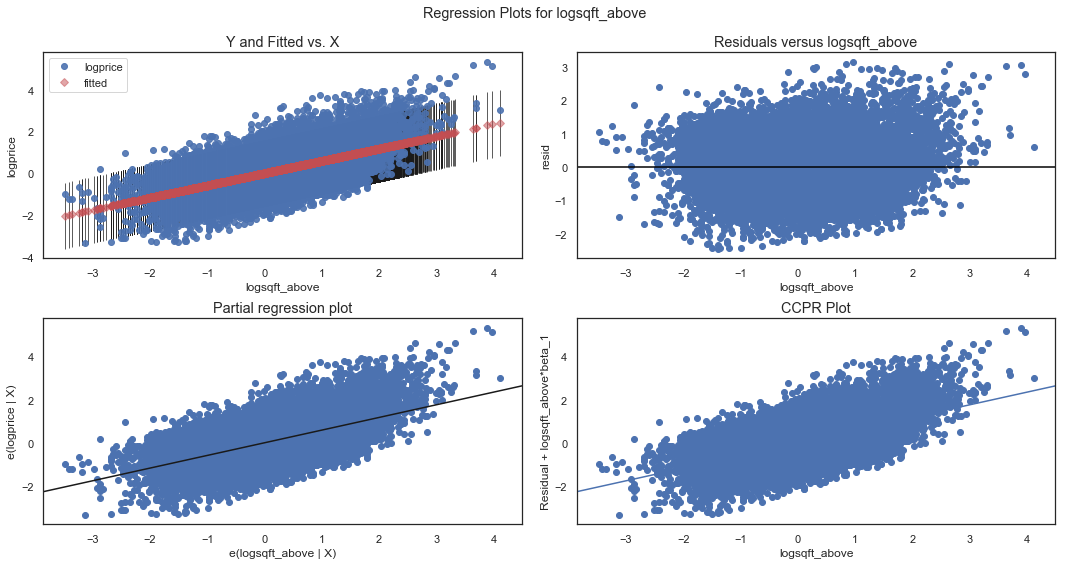

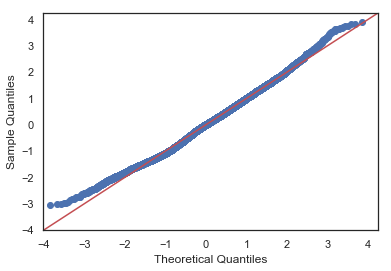

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['logsqft_above', 0.34516257395041716, 1.275715644233344e-13, 0.5875053820608167, 0.0]
Kansas City Real Estate: logprice~logsqft_living15
------------------------------


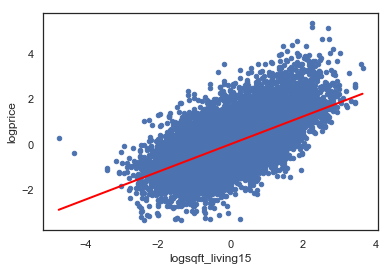

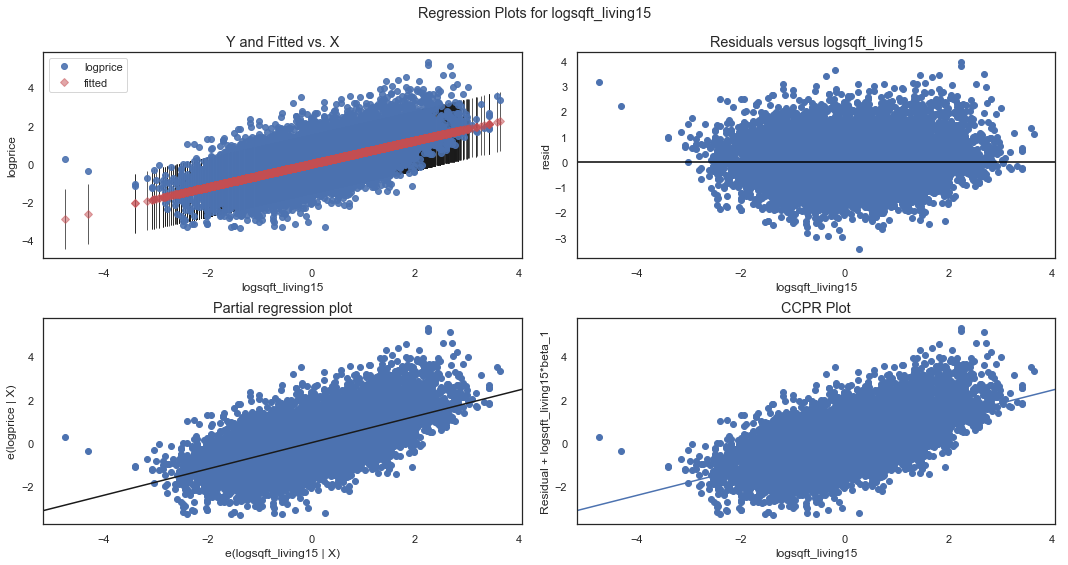

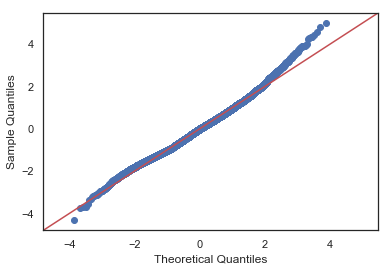

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['logsqft_living15', 0.3715114461031037, 1.979909292071369e-13, 0.609517387859541, 0.0]
Kansas City Real Estate: logprice~logsqft_basement
------------------------------


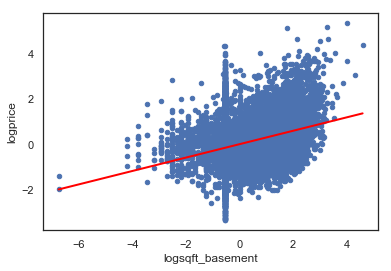

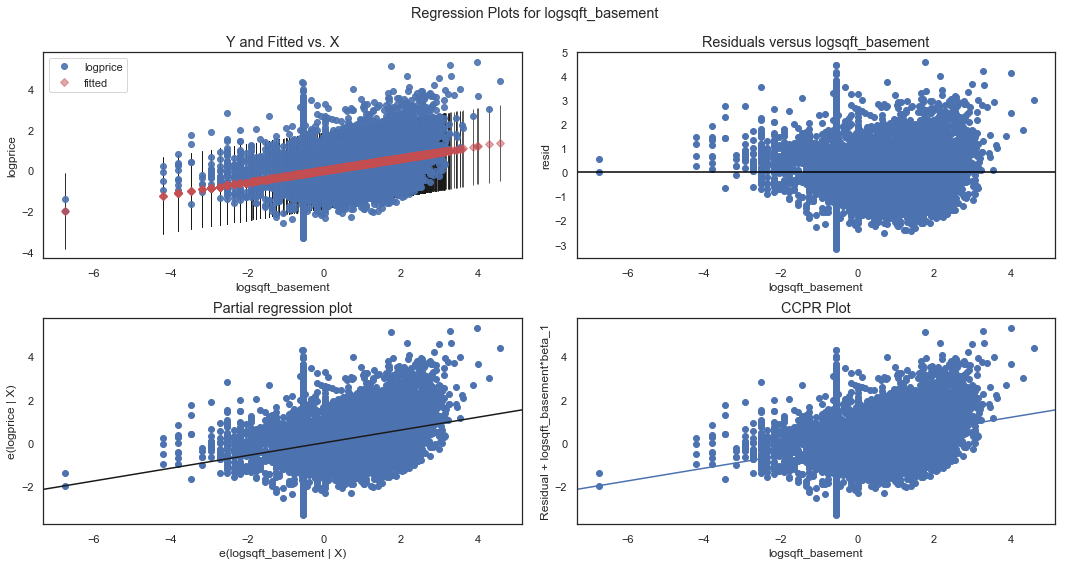

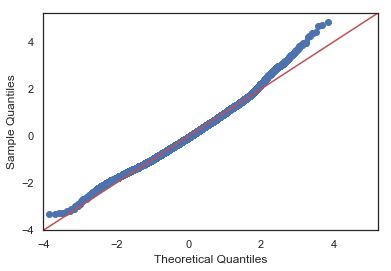

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['logsqft_basement', 0.0871882959733914, -5.894347510082554e-13, 0.29527664312196233, 0.0]
Kansas City Real Estate: logprice~logsqft_lot
------------------------------


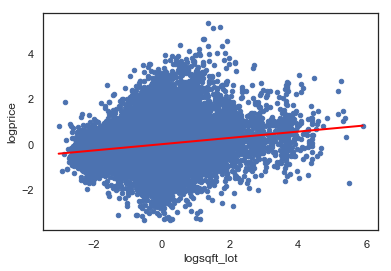

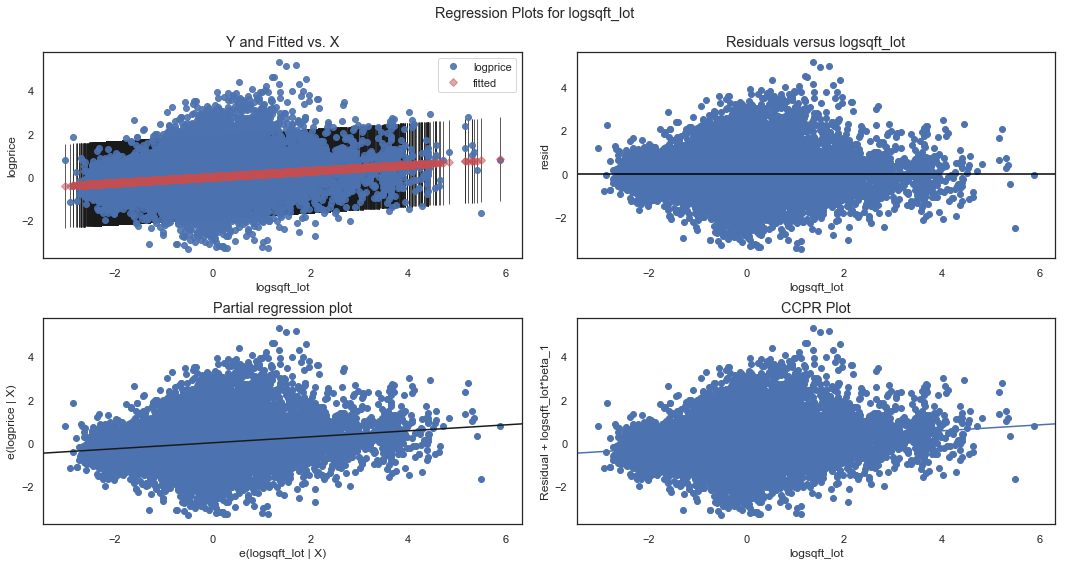

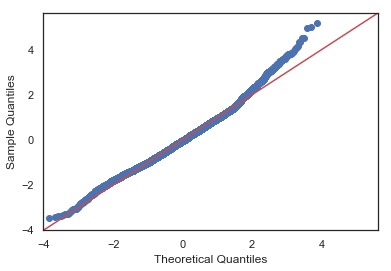

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['logsqft_lot', 0.019167782119866472, 2.13839362883661e-13, 0.1384477595335749, 3.698199181184176e-75]
Kansas City Real Estate: logprice~logsqft_lot15
------------------------------


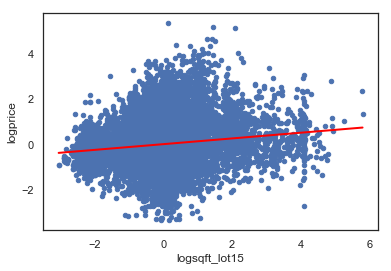

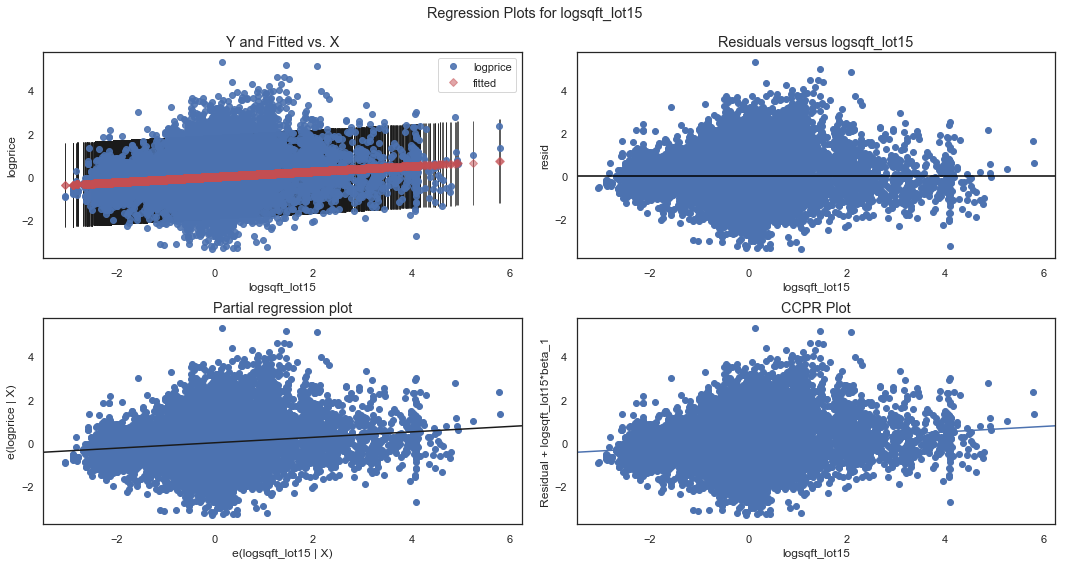

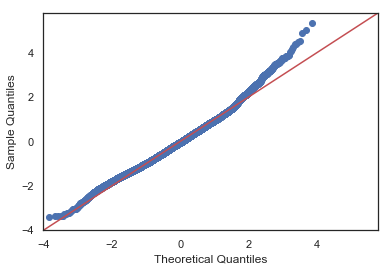

['logsqft_lot15', 0.01587875050319887, 2.1101870251172272e-13, 0.1260109142225352, 1.7699637174222403e-62]


In [36]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'normality(JB)']]
for idx, val in enumerate(['logsqft_above','logsqft_living15','logsqft_basement','logsqft_lot','logsqft_lot15']):
    print ("Kansas City Real Estate: logprice~" + val)
    print ("------------------------------")
    
    f = "logprice~" + val
    model = smf.ols(formula=f, data=data_log).fit()
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]})
    preds = model.predict(X_new)
    data_log.plot(kind='scatter', x=val, y='logprice');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx + 1])

The matrix graphs shows better normal distributions and more linearity yet the r-squared values did not show improvement.

The categorical predictors may still have strong relationships with sale price. I'll move forward with the original continuous predictors. Next, I'll address the categorical predictors.

In [37]:
# data.id = (data.id - data.id.mean())/data.id.std() #is this necessary?
# #data.lat = (data.lat - data.lat.mean()) / data.lat.std()
# #data.long = (data.long - data.long.mean()) / data.long.std()
# data.sqft_above = (data.sqft_above - data.sqft_above.mean()) / data.sqft_above.std()
# data.sqft_lot15 = (data.sqft_lot15 - data.sqft_lot15.mean()) / data.sqft_lot15.std()
# data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
# data.sqft_basement = (data.sqft_basement - data.sqft_basement.mean()) / data.sqft_basement.std()
# data.yr_renovated = (data.yr_renovated - data.yr_renovated.mean()) / data.yr_renovated.std()
# #data.price = (data.price - data.price.mean()) / data.price.std() #should i normalize the target?

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 17 columns):
id               17389 non-null int64
price            17389 non-null float64
bedrooms         17389 non-null object
bathrooms        17389 non-null object
sqft_lot         17389 non-null int64
floors           17389 non-null object
waterfront       17389 non-null object
view             17389 non-null object
condition        17389 non-null object
grade            17389 non-null object
sqft_above       17389 non-null int64
sqft_basement    17389 non-null float64
yr_built         17389 non-null object
yr_renovated     17389 non-null category
zipcode          17389 non-null object
sqft_living15    17389 non-null int64
sqft_lot15       17389 non-null int64
dtypes: category(1), float64(2), int64(5), object(9)
memory usage: 2.3+ MB


___One-Hot Encoding___

In [39]:
# data = pd.get_dummies(data)

In [40]:
data.shape

(17389, 17)

In [41]:
data.describe()
data.yr_built = data.yr_built.astype('int')
data.yr_renovated = data.yr_renovated.astype('int')

Clearly, some bins are needed to make the data set more manageable. I'll start by creating bins for __year_built__ and __year_renovated__ to categorize the records in most to less-recently built & renovated.

In [42]:
# bins = ['Built_1', 'Built_2', 'Built_3', 'Built_4', 'Built_5','Built_6','Built_7','Built_8','Built_9','Built_10']

# for i in range (1, 11):
#     data["Built_" + str(i)] = pd.cut(data["yr_built" + str(i)], 10, labels=bins)
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
data['Built_binned'] = pd.cut(data['yr_built'], bins)
data['Renovated_binned'] = pd.cut(data['yr_renovated'], bins)
data.drop(columns=["yr_built","yr_renovated"], inplace=True)



In [43]:
data.head()

id      price bedrooms bathrooms  sqft_lot floors waterfront view  \
0  7129300520   221900.0        3       1.0      5650    1.0        nan  0.0   
1  6414100192   538000.0        3      2.25      7242    2.0        0.0  0.0   
3  2487200875   604000.0        4       3.0      5000    1.0        0.0  0.0   
4  1954400510   510000.0        3       2.0      8080    1.0        0.0  0.0   
5  7237550310  1230000.0        4       4.5    101930    1.0        0.0  0.0   

  condition grade  sqft_above  sqft_basement zipcode  sqft_living15  \
0         3     7        1180     292.924608   98178           1340   
1         3     7        2170     400.000000   98125           1690   
3         5     7        1050     910.000000   98136           1360   
4         3     8        1680     292.924608   98074           1800   
5         3    11        3890    1530.000000   98053           4760   

   sqft_lot15  Built_binned Renovated_binned  
0        5650  (1950, 1960]              NaN  
1        7639  (1950, 1960]     (1990, 2000]  
3        5000  (1960, 1970]              NaN  
4        7503  (1980, 1990]              NaN  
5      101930  (2000, 2010]              NaN

In [44]:
data.isna().sum()

id                      0
price                   0
bedrooms                0
bathrooms               0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
zipcode                 0
sqft_living15           0
sqft_lot15              0
Built_binned           68
Renovated_binned    16666
dtype: int64

In [45]:
data = pd.get_dummies(data)

In [46]:
data.head()

id      price  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0  7129300520   221900.0      5650        1180     292.924608           1340   
1  6414100192   538000.0      7242        2170     400.000000           1690   
3  2487200875   604000.0      5000        1050     910.000000           1360   
4  1954400510   510000.0      8080        1680     292.924608           1800   
5  7237550310  1230000.0    101930        3890    1530.000000           4760   

   sqft_lot15  bedrooms_1  bedrooms_10  bedrooms_11  \
0        5650           0            0            0   
1        7639           0            0            0   
3        5000           0            0            0   
4        7503           0            0            0   
5      101930           0            0            0   

               ...                Renovated_binned_(1920, 1930]  \
0              ...                                            0   
1              ...                                            0   
3              ...                                            0   
4              ...                                            0   
5              ...                                            0   

   Renovated_binned_(1930, 1940]  Renovated_binned_(1940, 1950]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1950, 1960]  Renovated_binned_(1960, 1970]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1970, 1980]  Renovated_binned_(1980, 1990]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1990, 2000]  Renovated_binned_(2000, 2010]  \
0                              0                              0   
1                              1                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(2010, 2020]  
0                              0  
1                              0  
3                              0  
4                              0  
5                              0  

[5 rows x 172 columns]

___Check for Linearity between Predictors and Target___

As a final step before the modeling stage, I'll perform a joint plot to check for the linearity assumption between predictors and target variables.

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


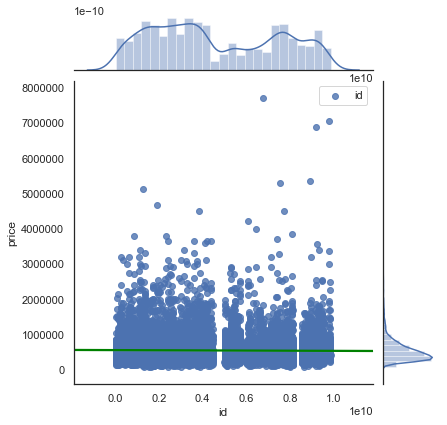

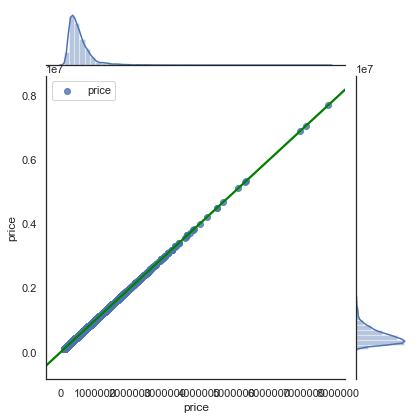

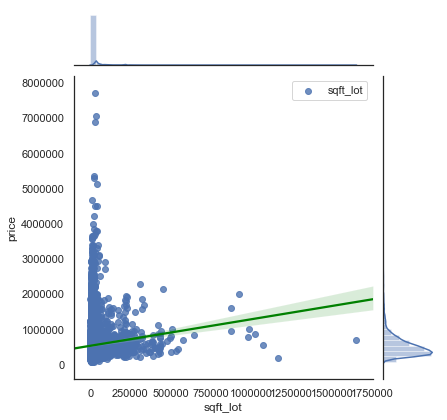

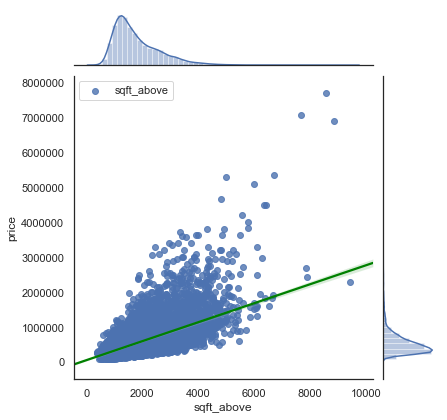

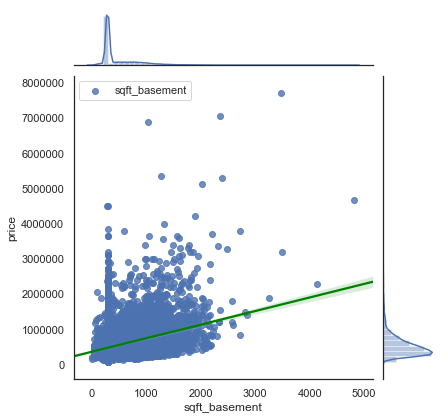

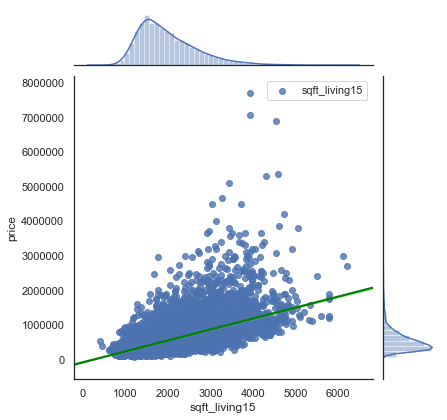

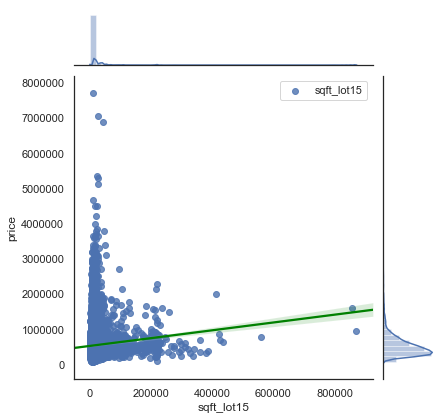

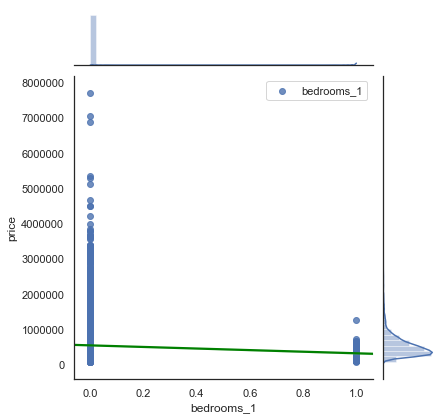

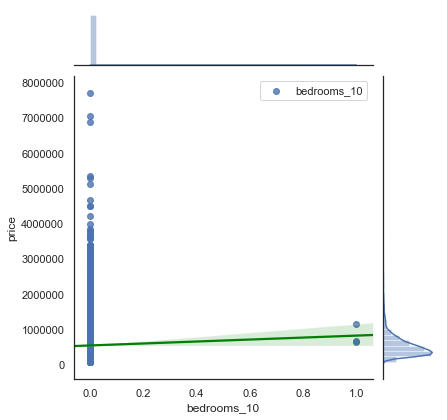

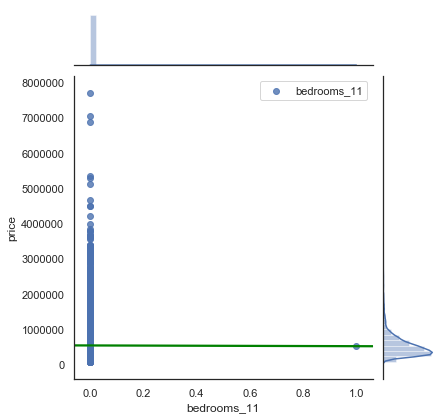

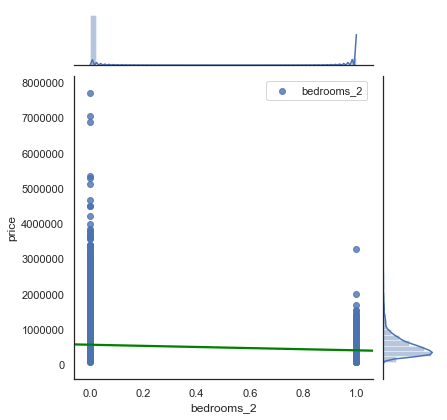

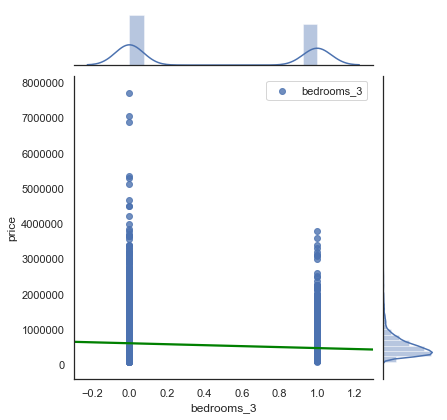

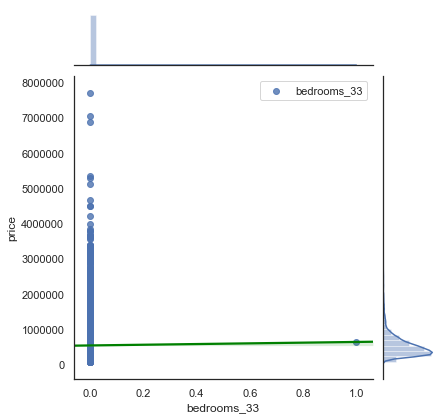

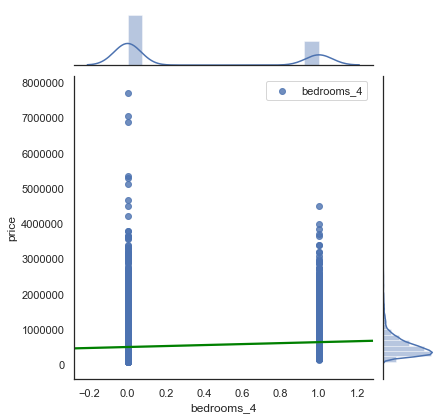

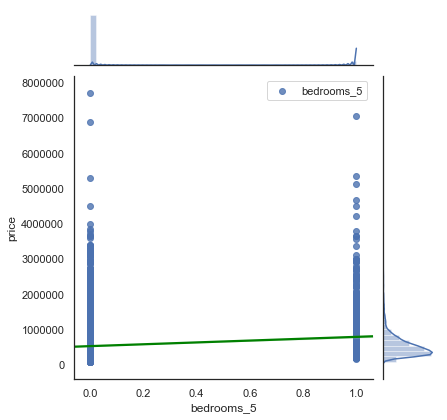

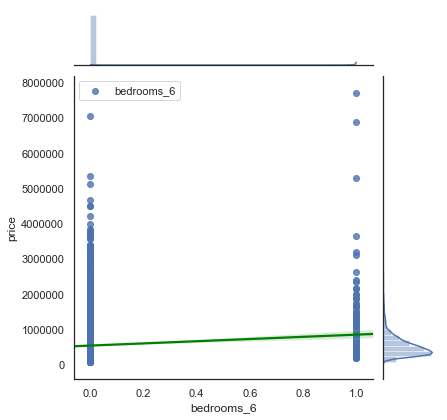

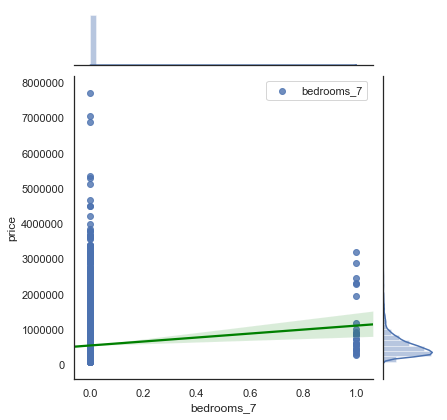

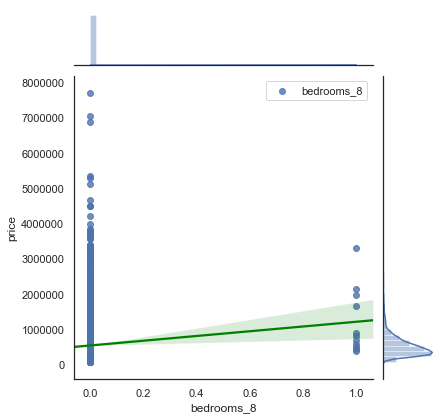

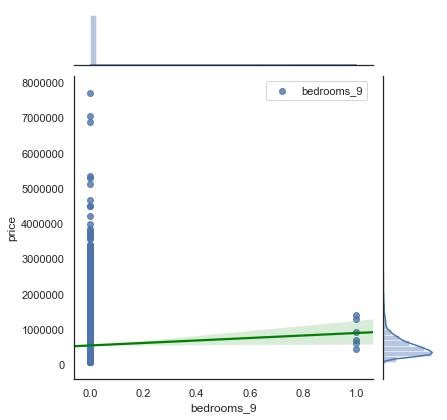

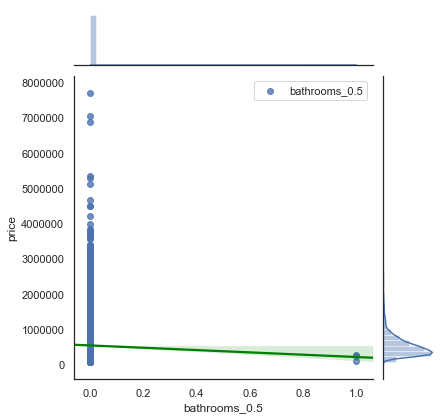

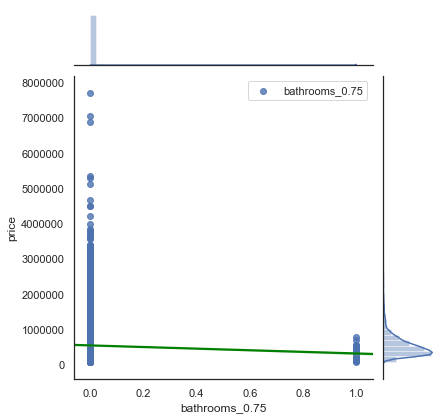

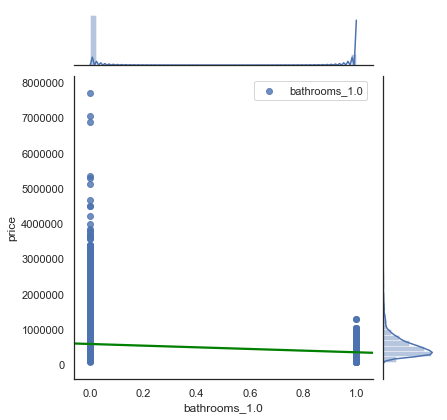

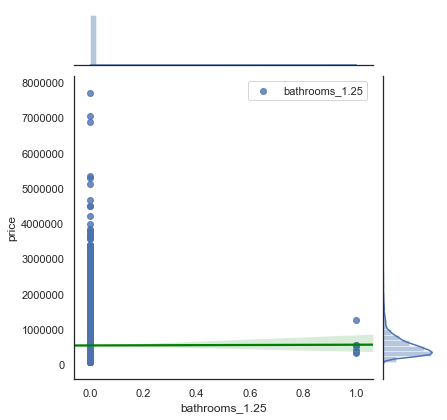

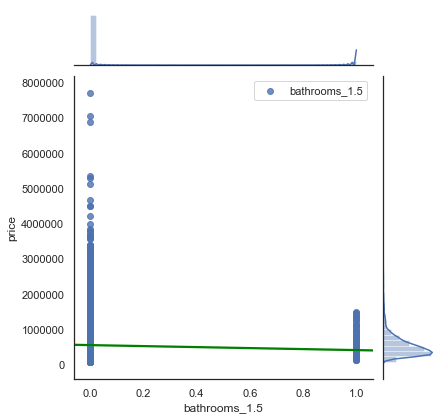

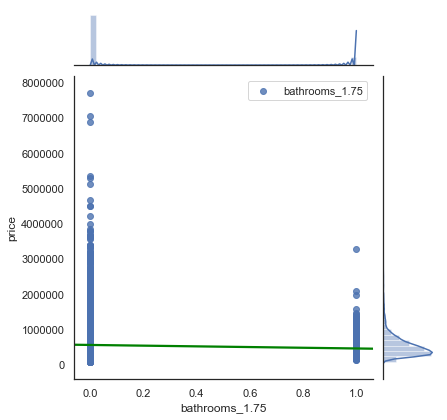

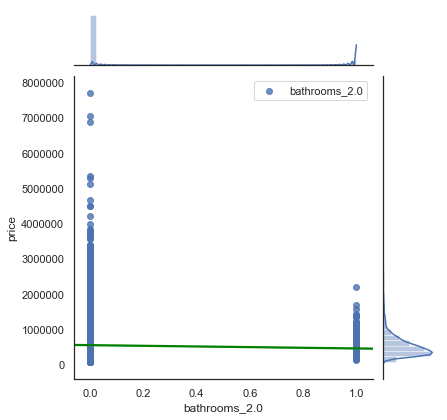

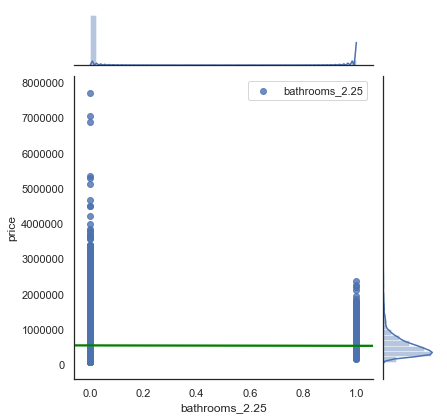

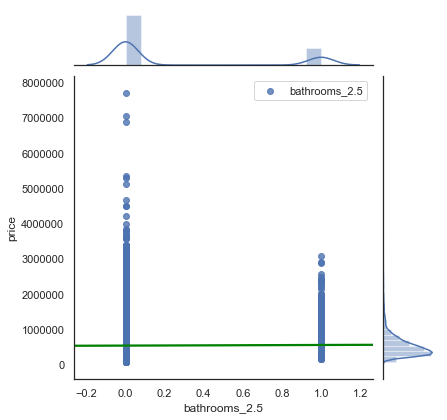

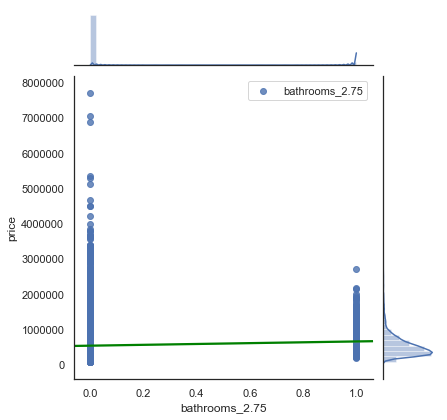

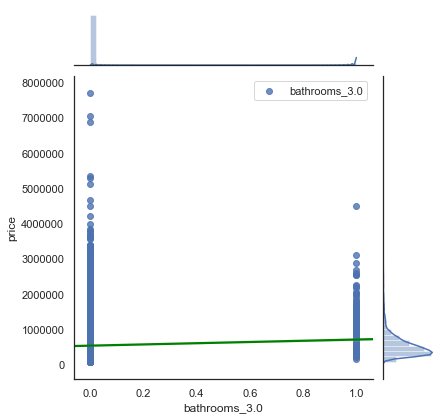

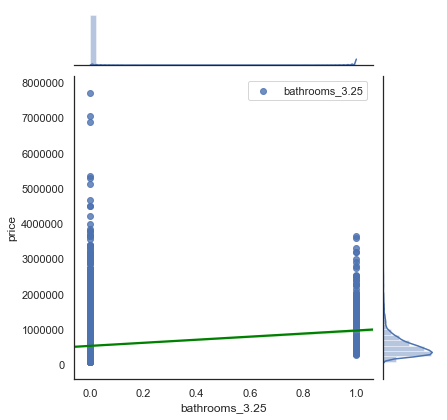

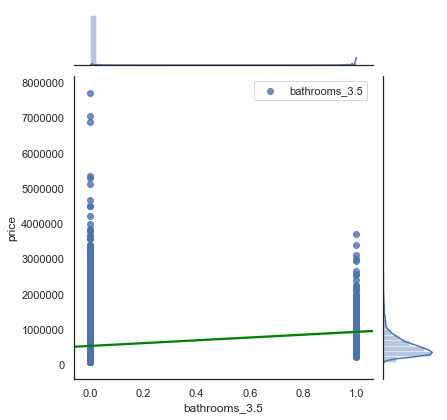

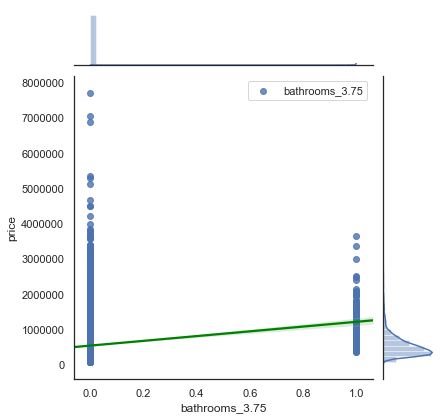

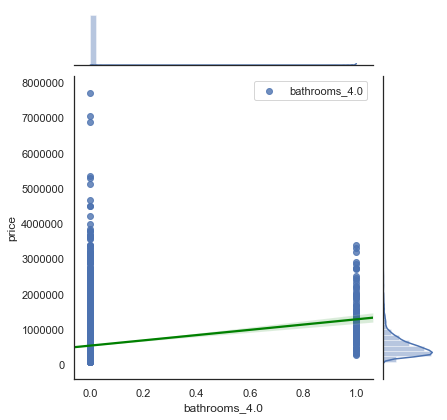

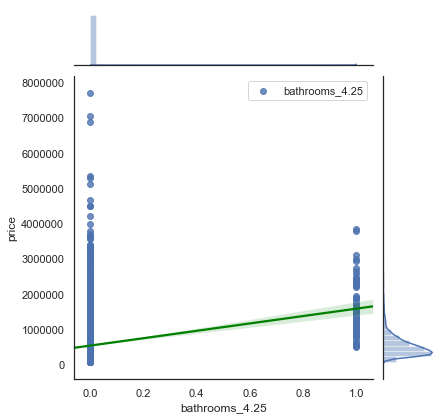

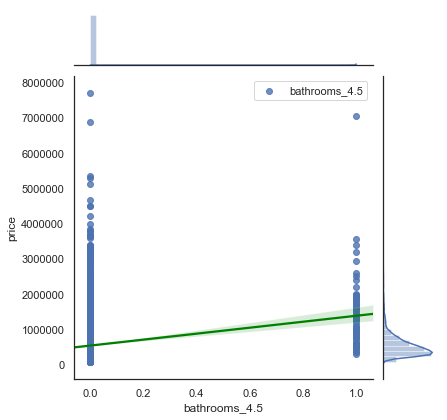

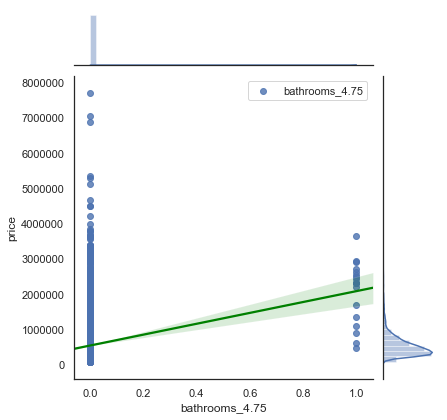

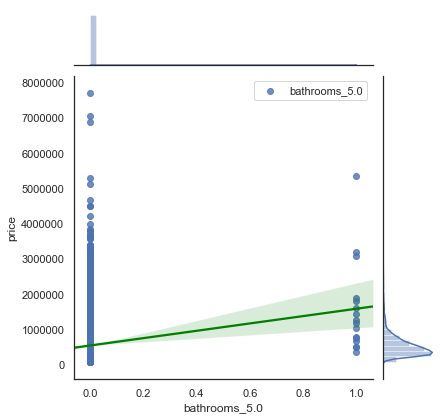

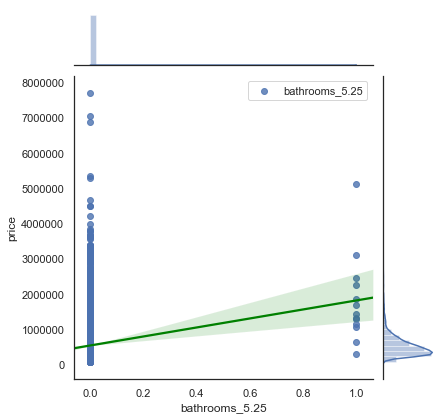

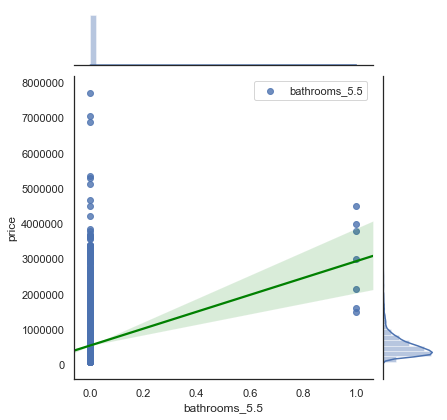

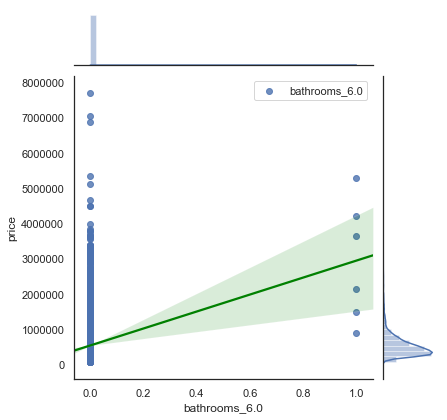

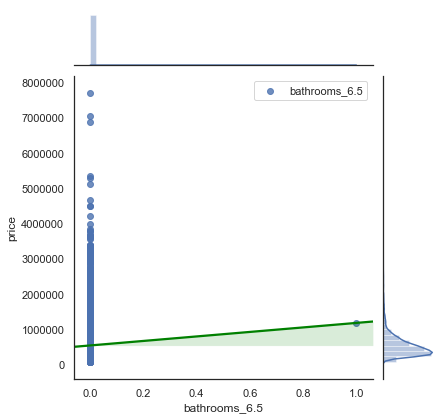

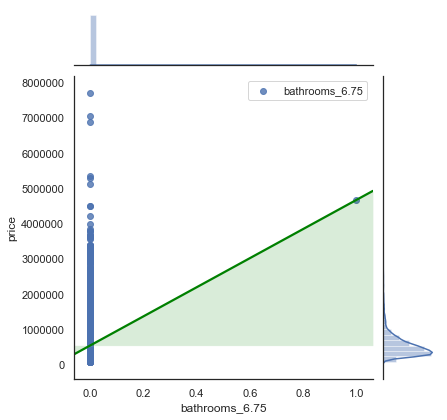

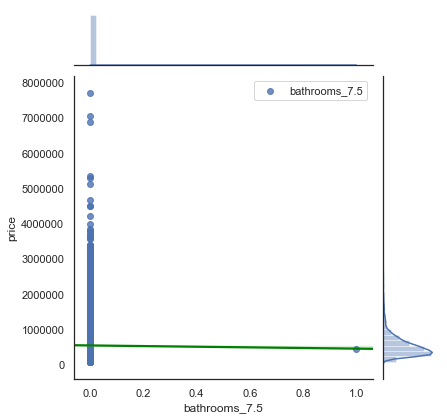

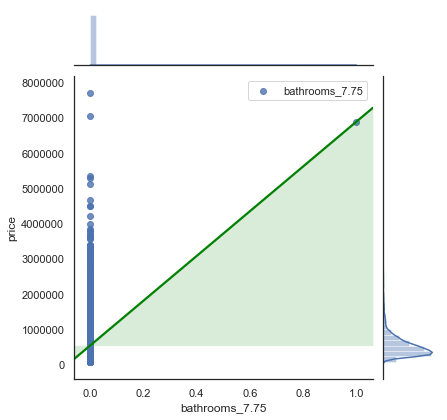

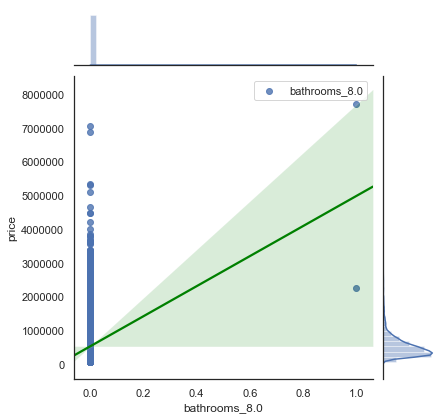

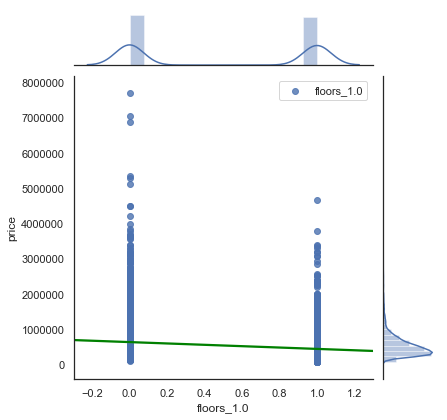

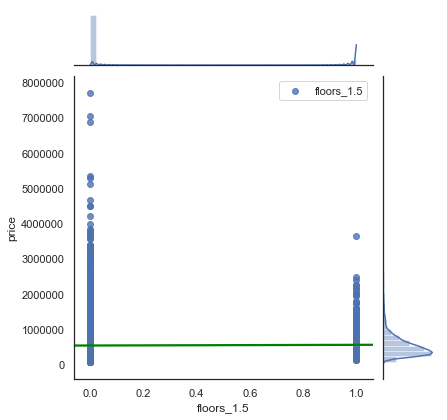

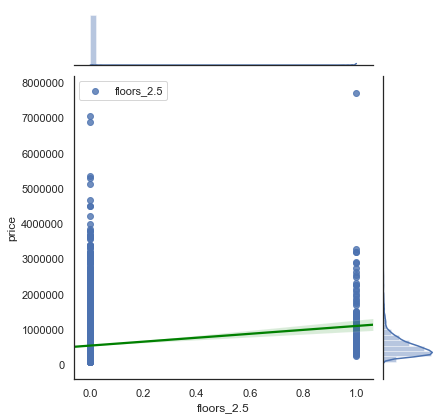

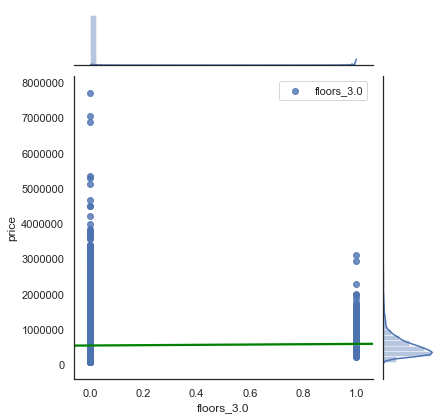

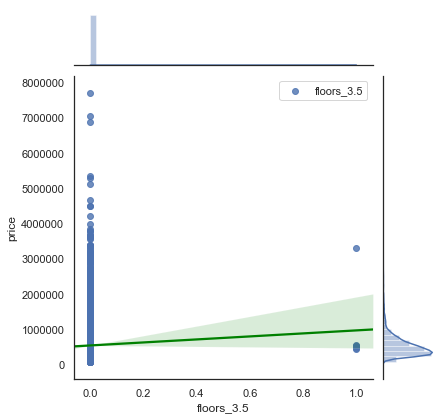

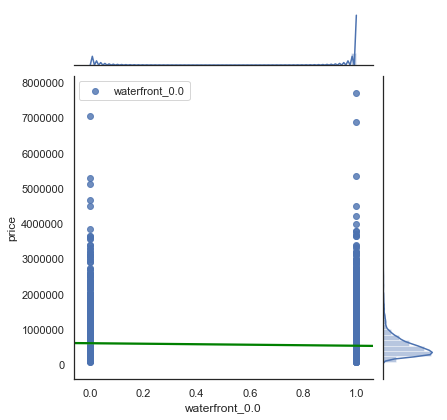

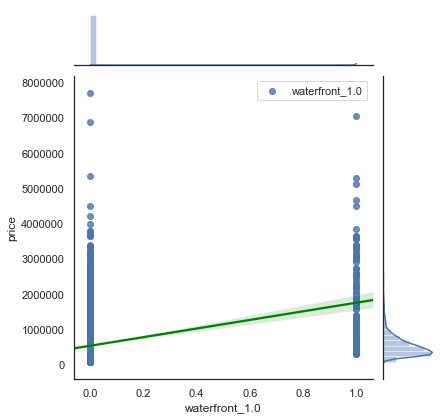

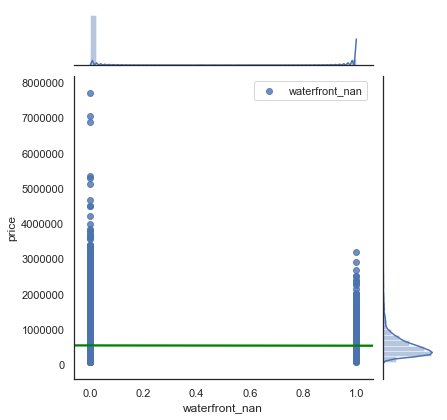

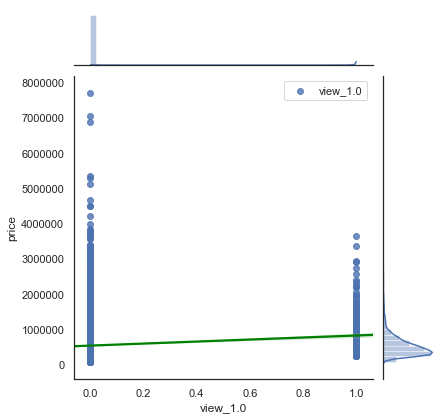

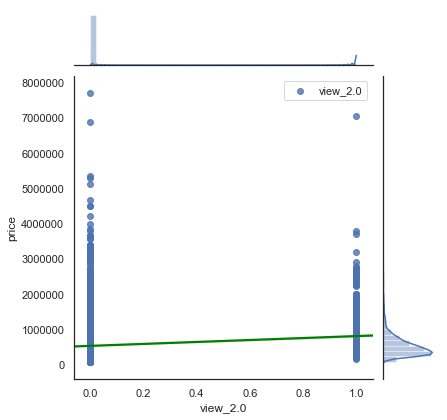

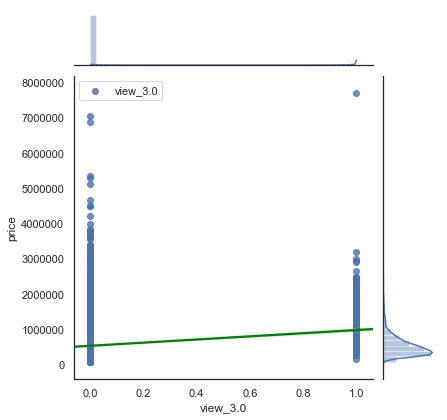

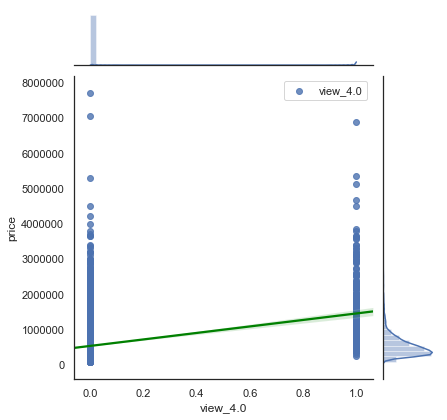

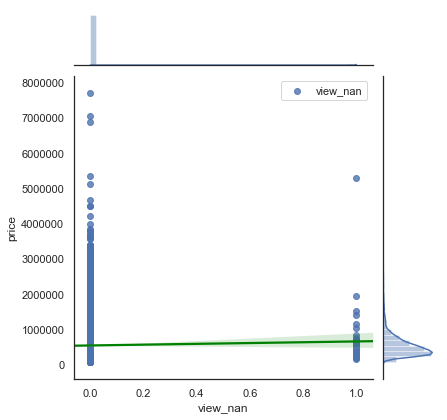

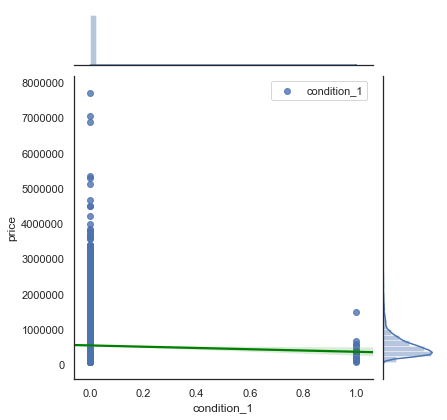

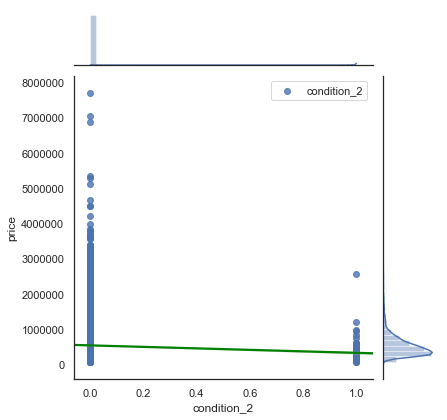

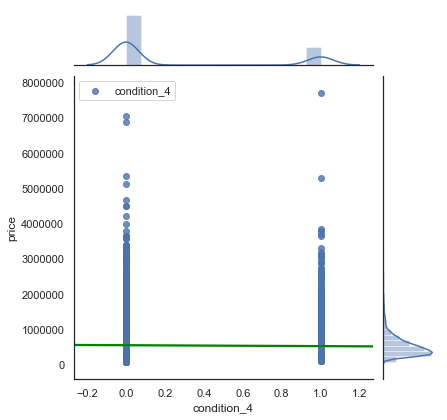

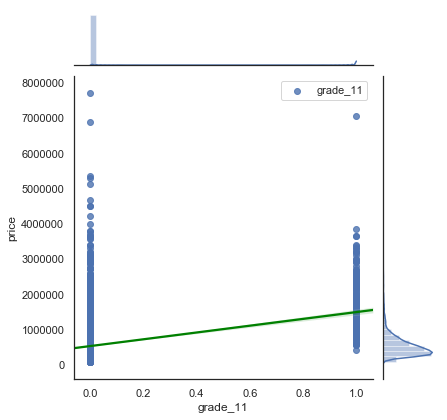

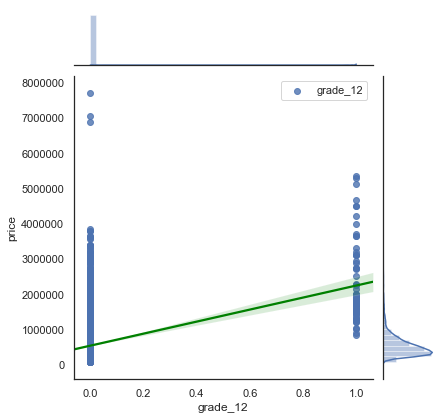

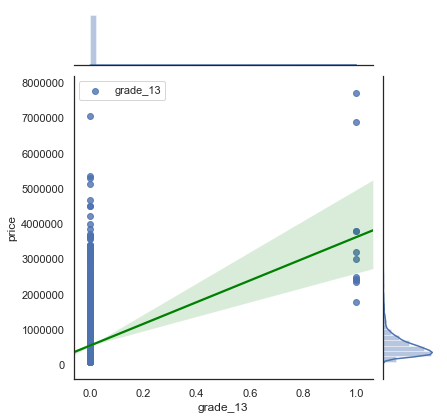

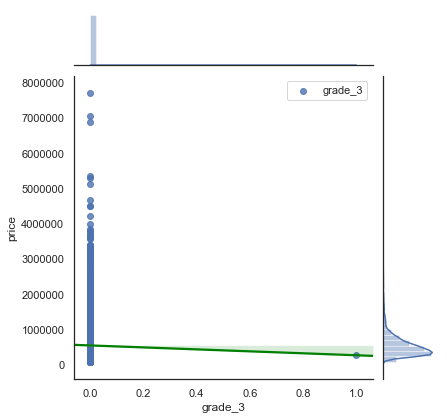

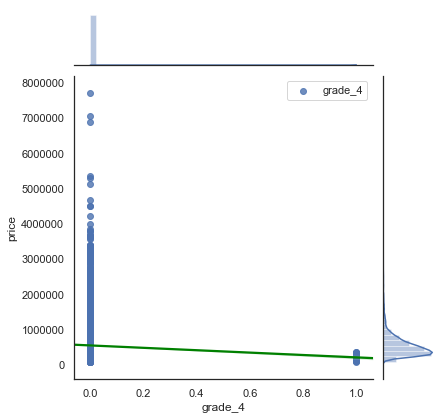

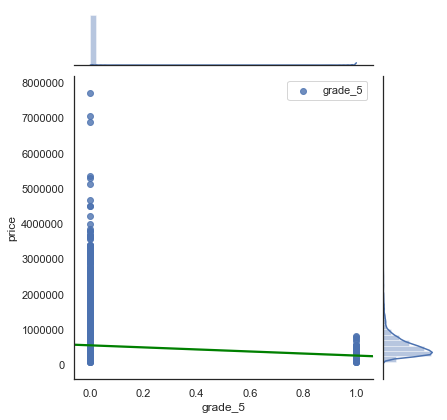

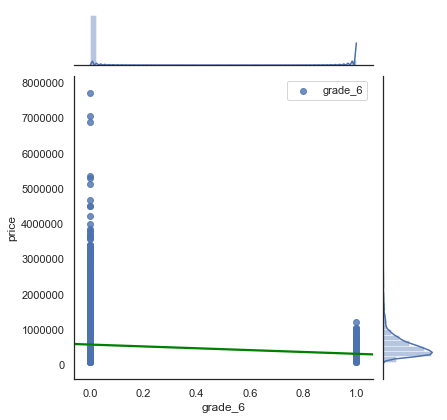

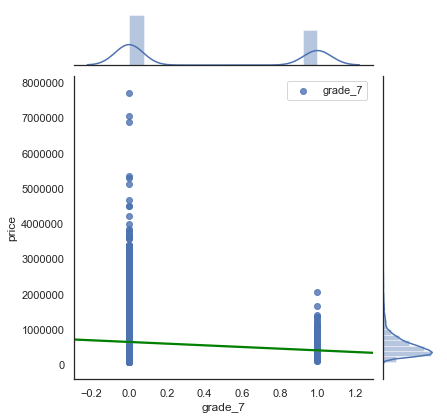

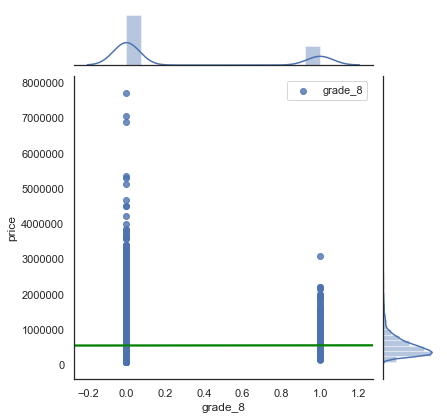

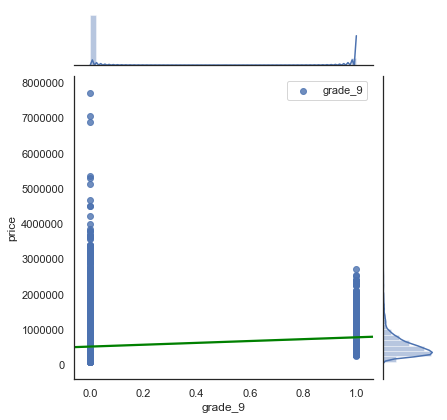

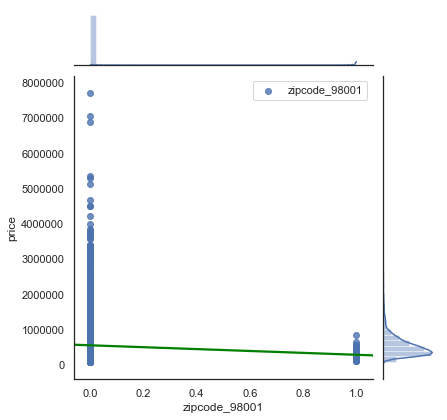

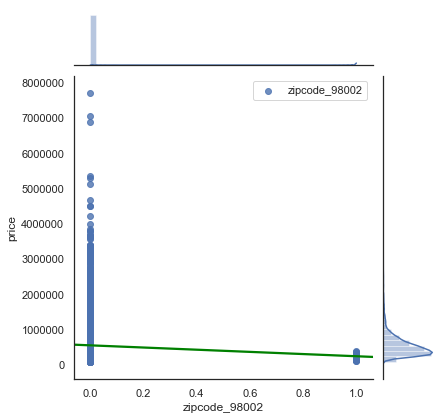

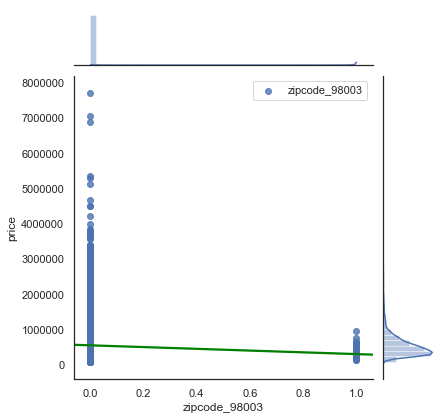

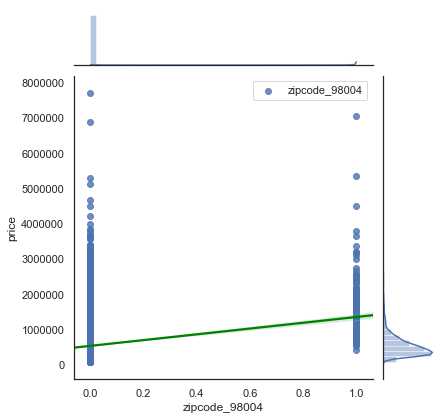

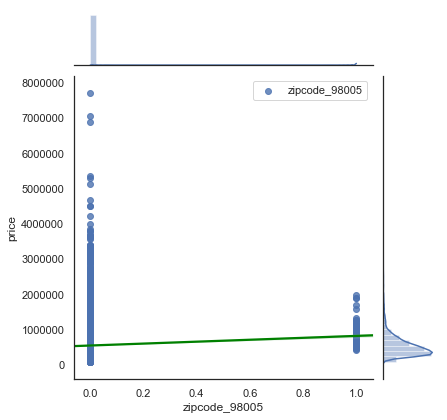

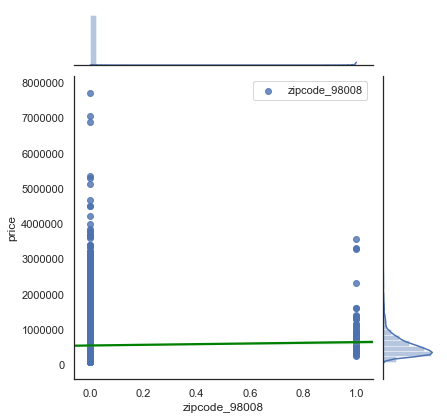

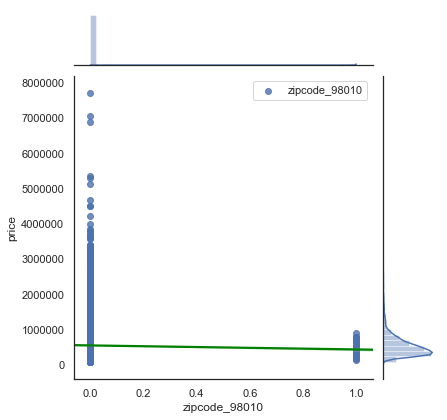

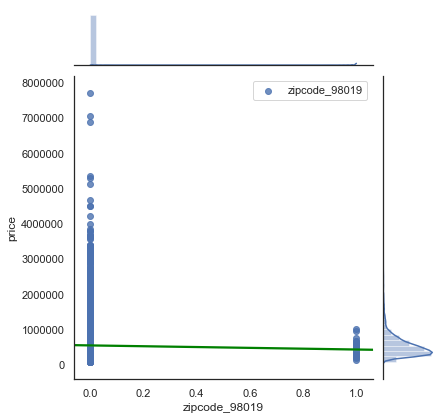

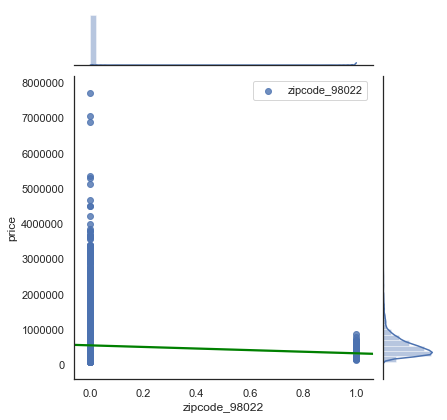

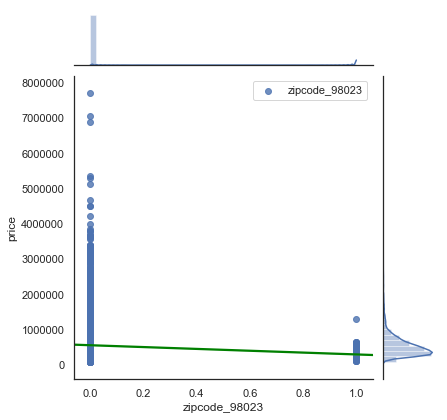

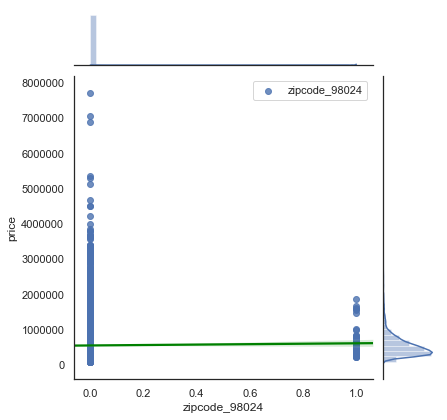

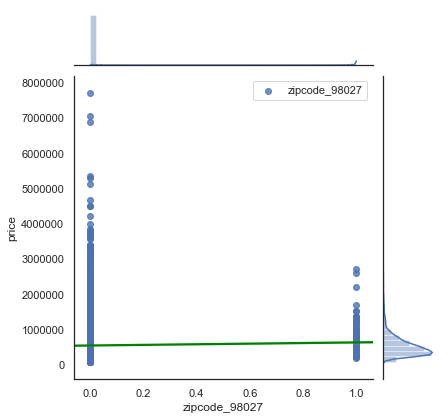

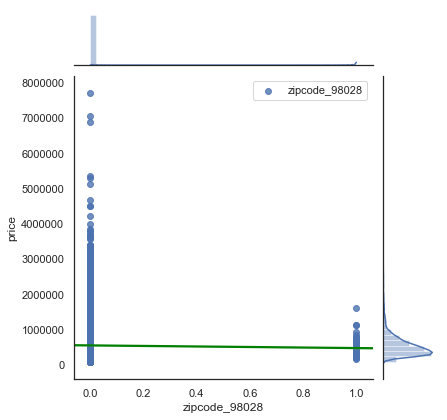

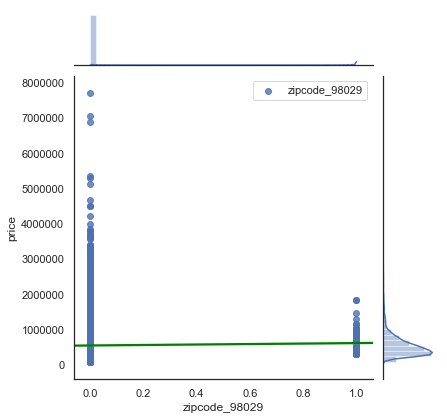

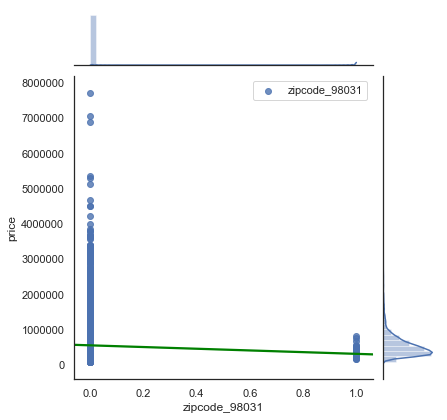

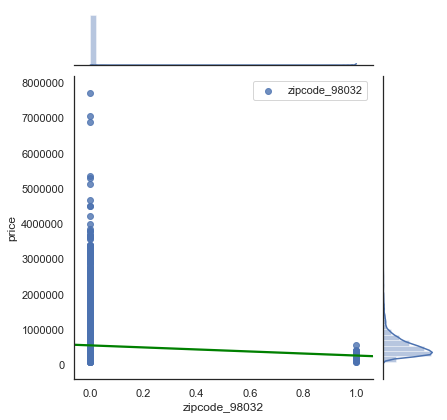

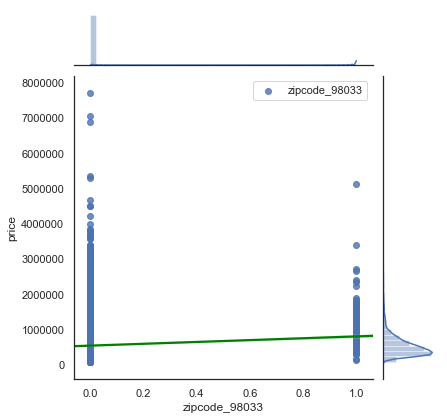

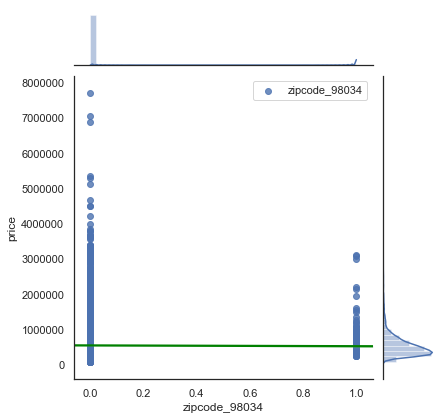

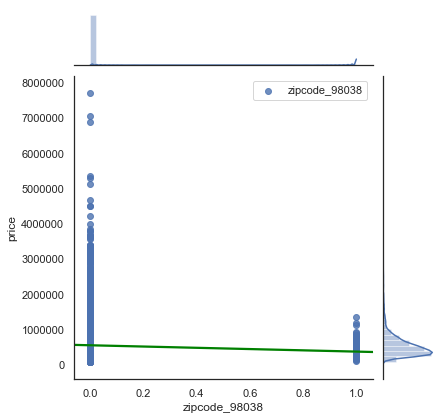

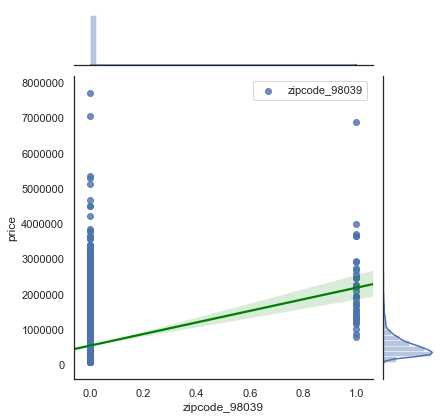

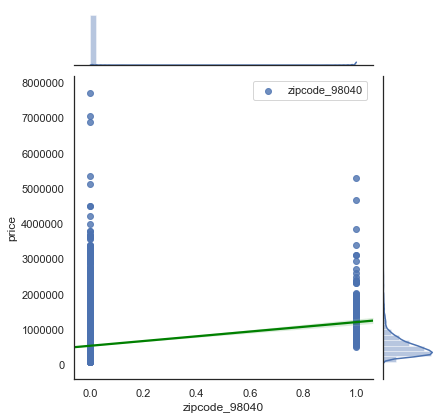

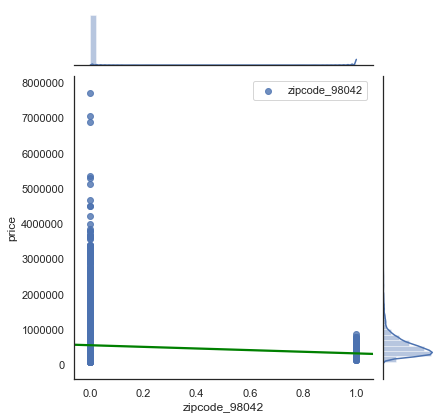

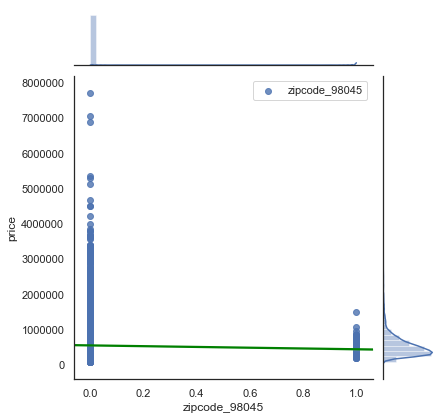

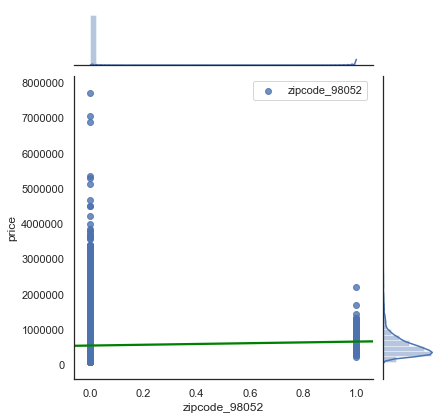

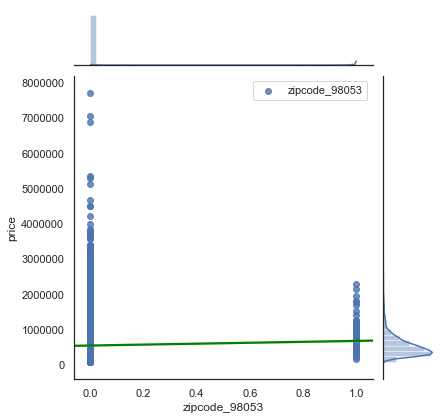

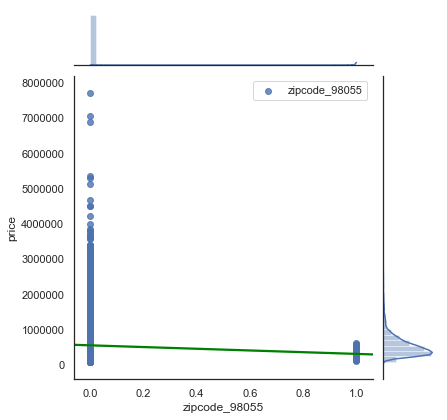

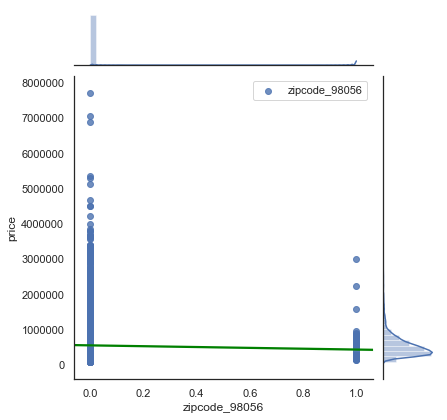

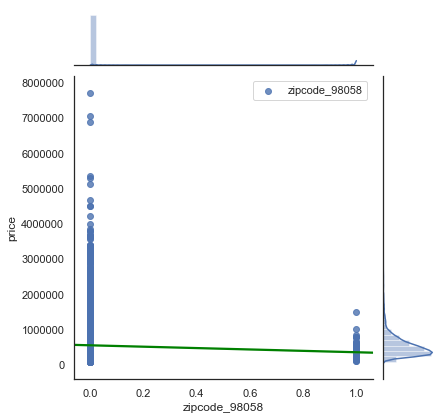

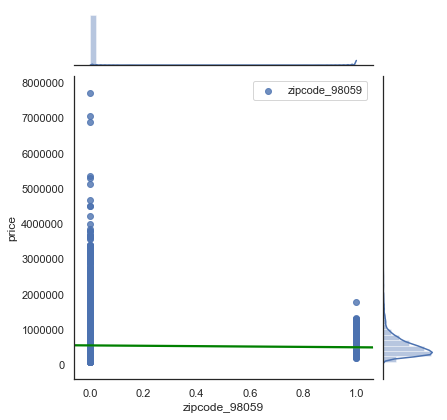

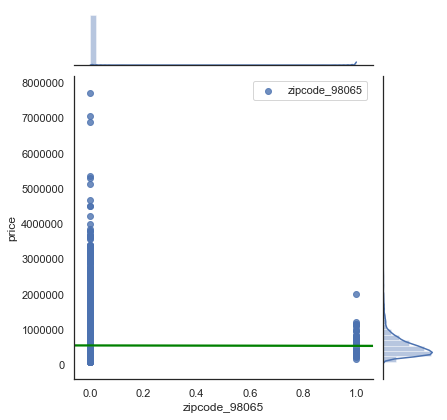

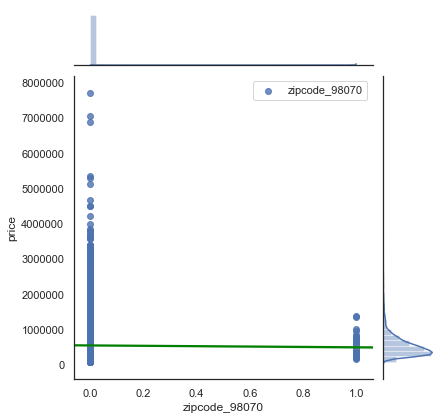

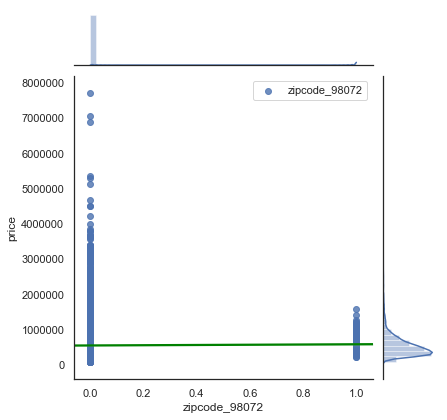

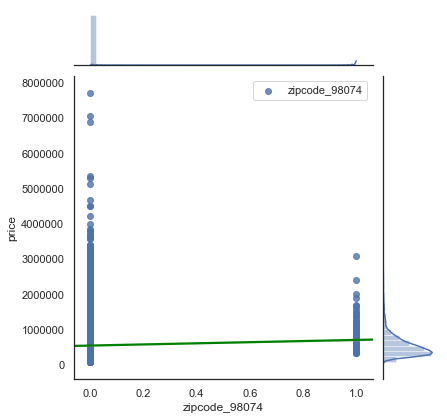

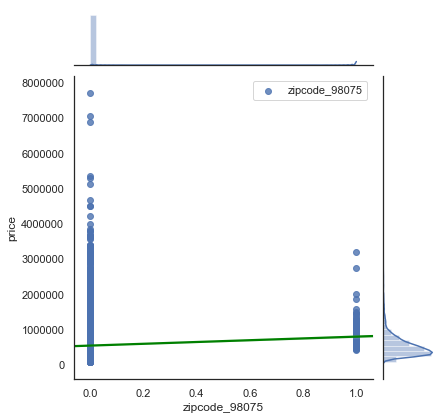

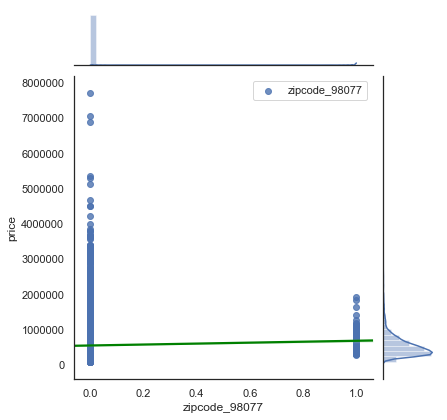

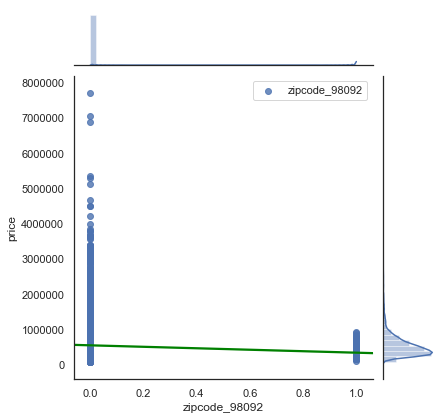

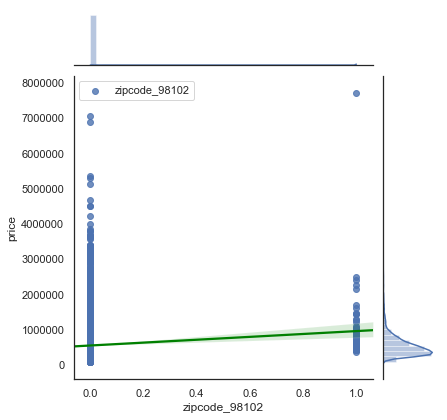

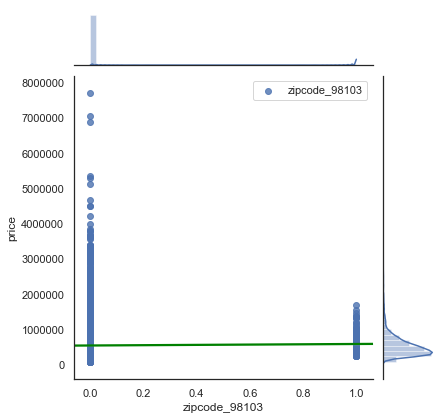

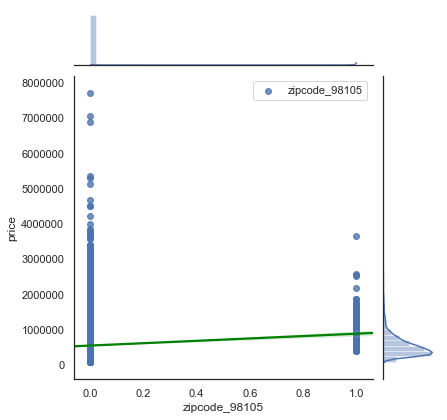

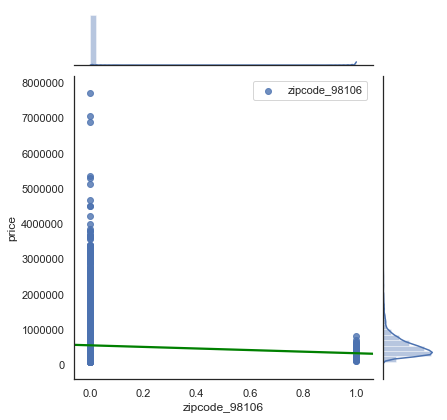

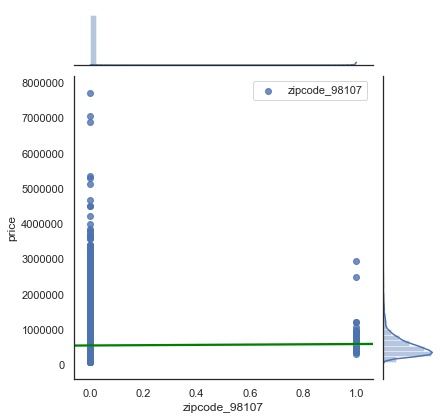

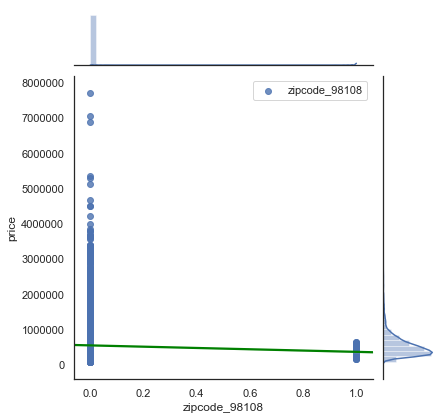

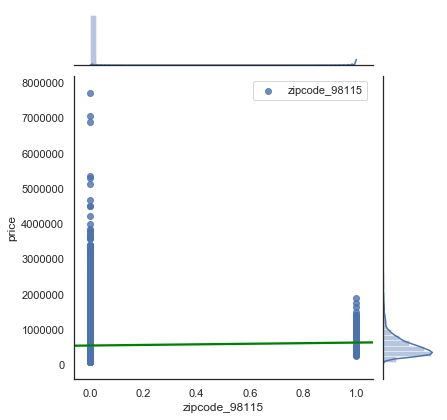

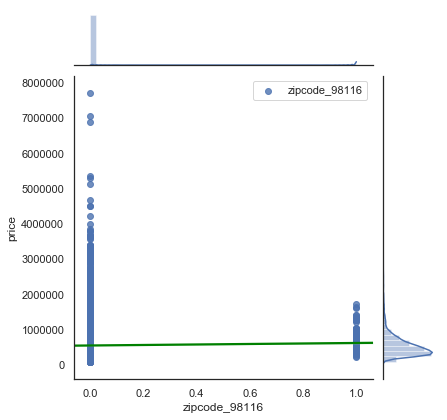

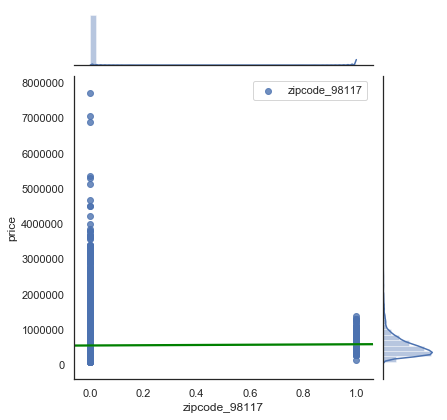

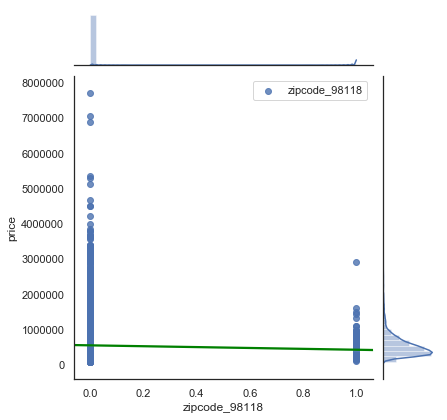

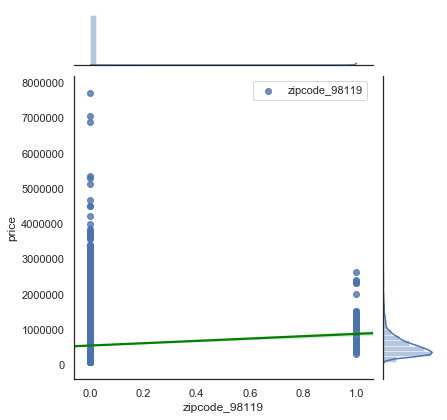

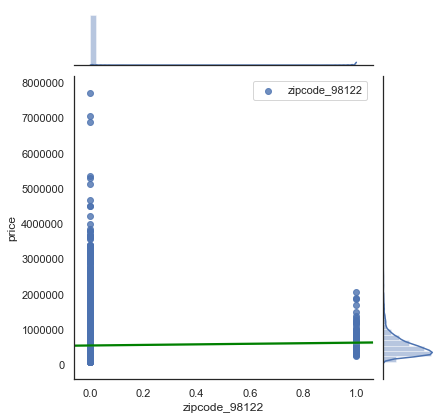

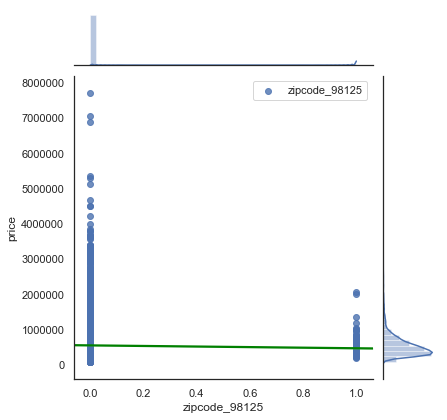

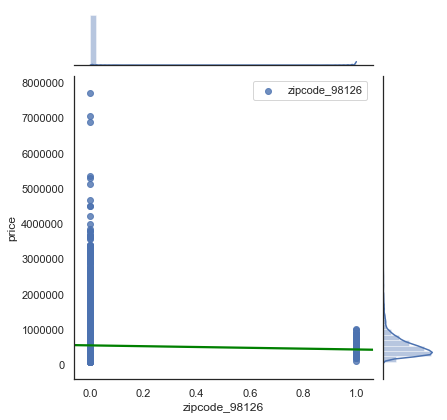

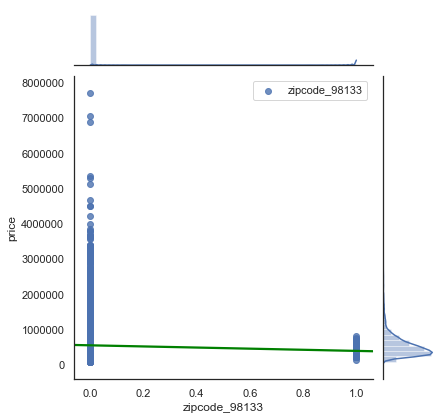

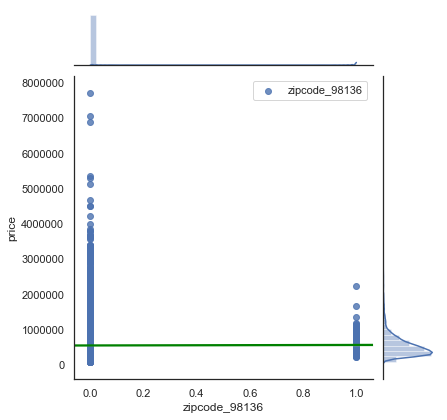

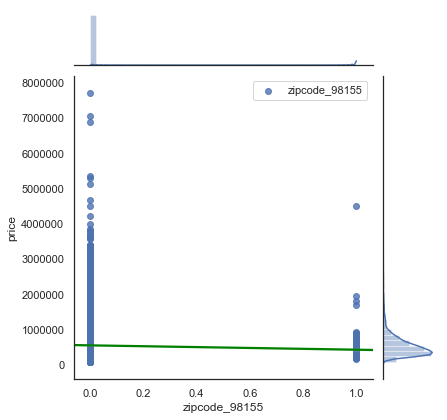

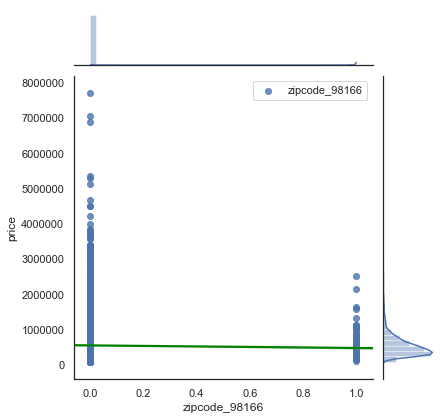

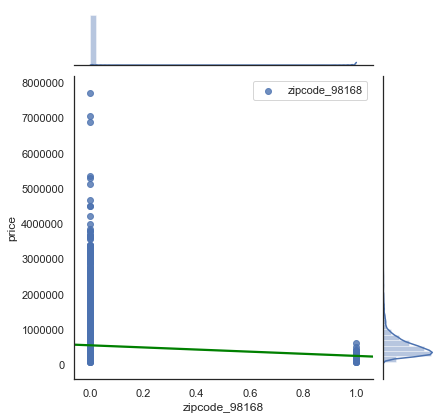

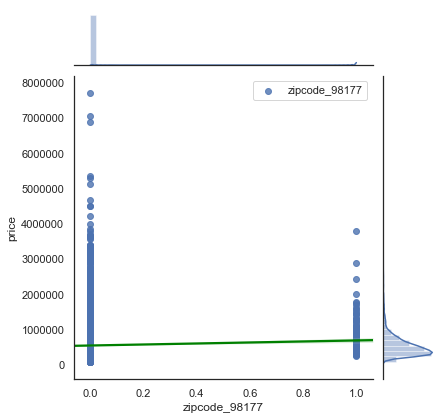

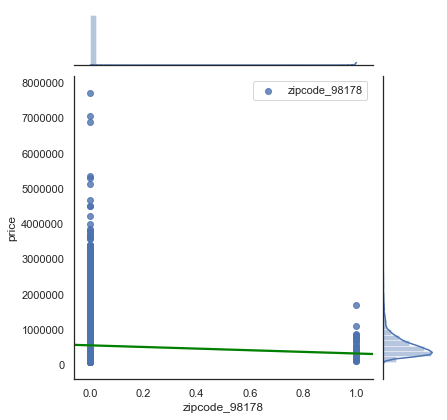

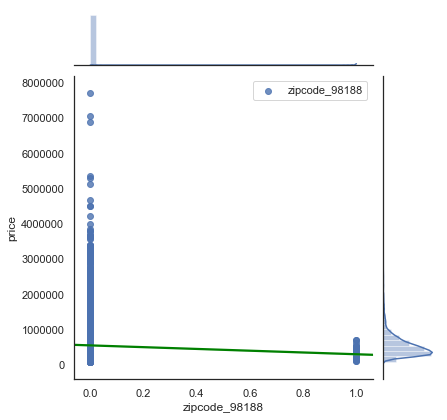

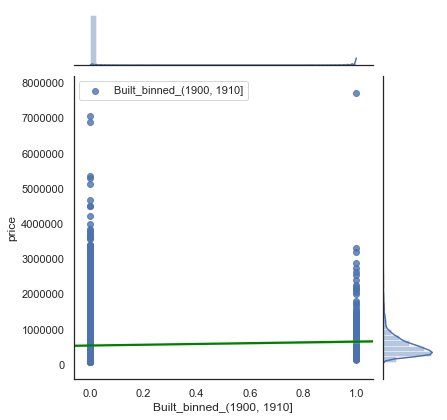

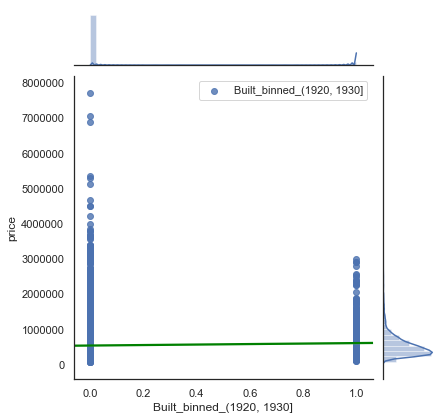

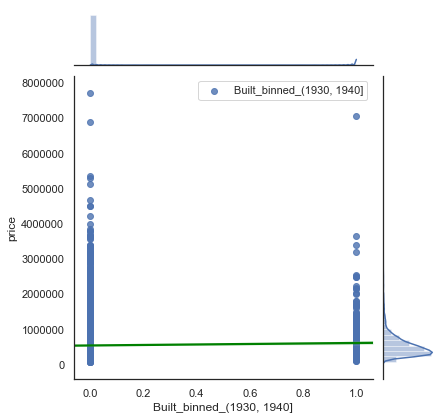

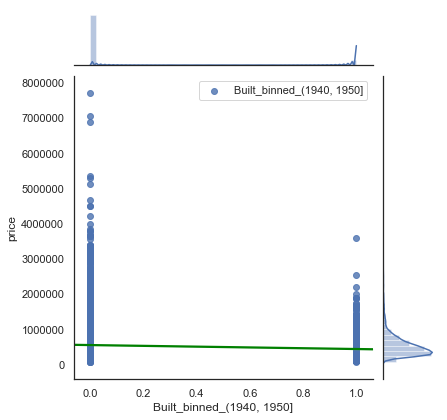

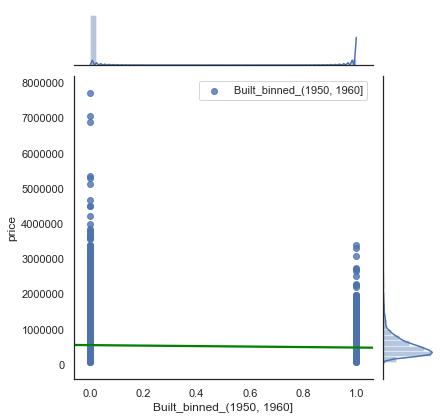

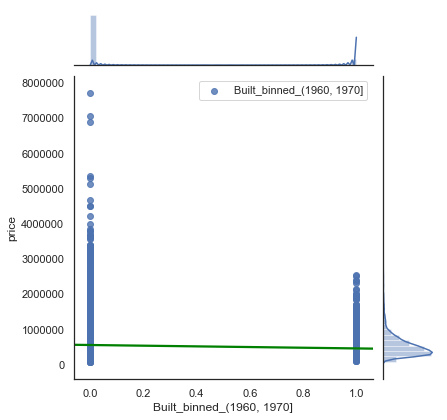

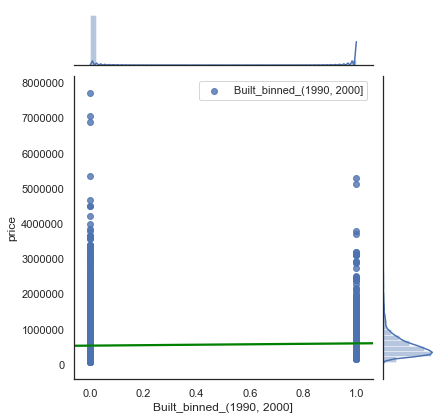

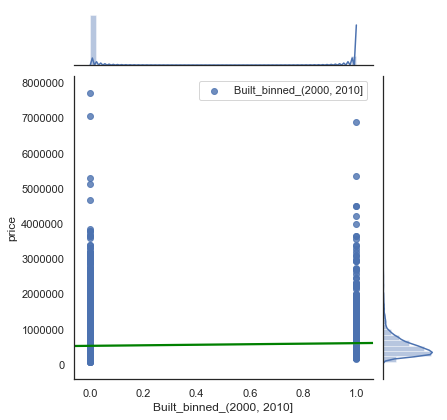

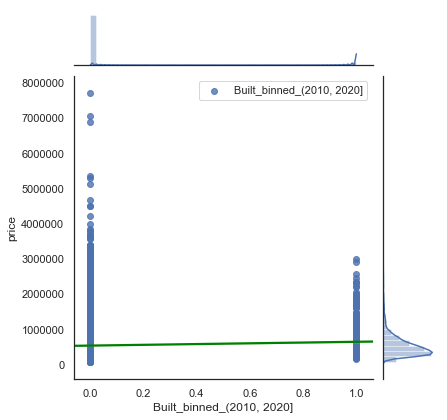

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


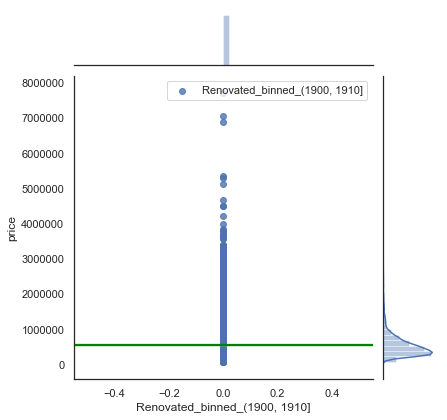

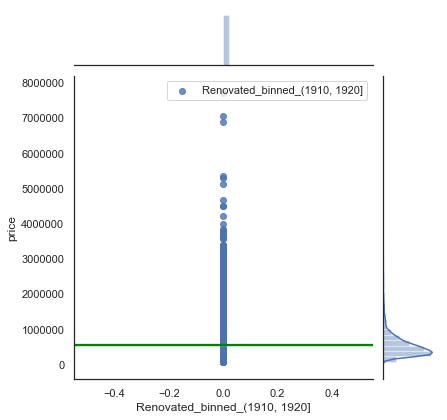

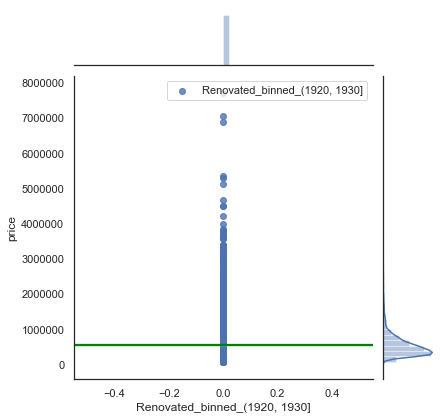

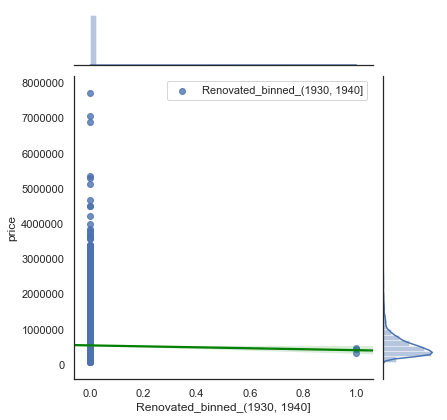

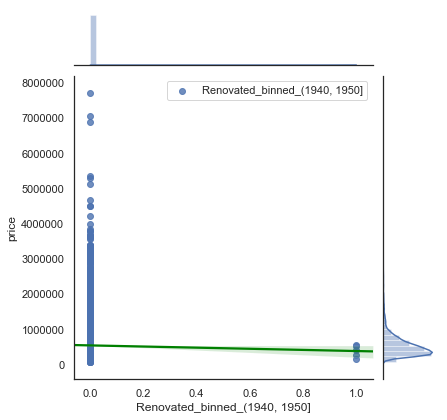

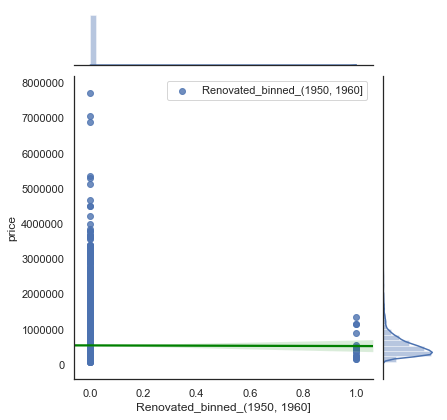

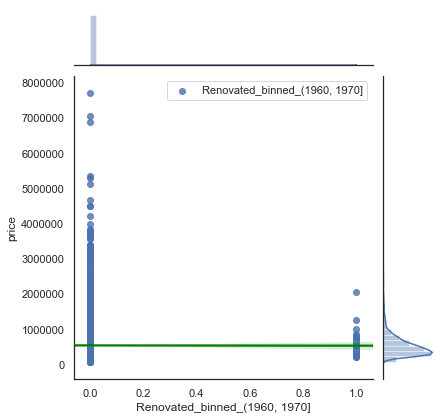

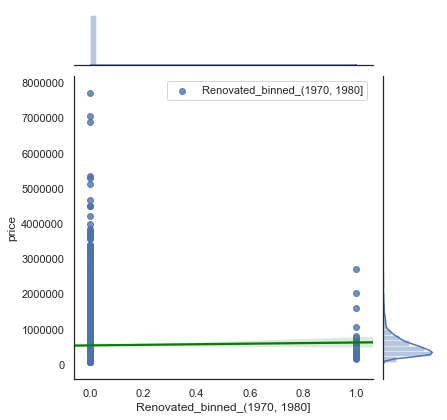

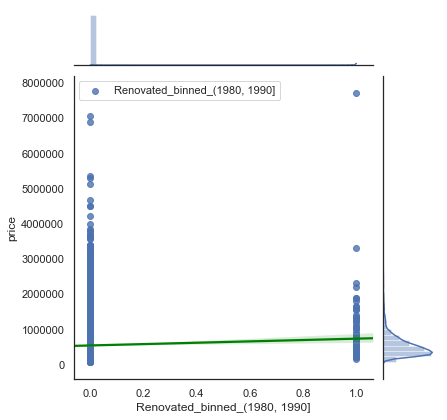

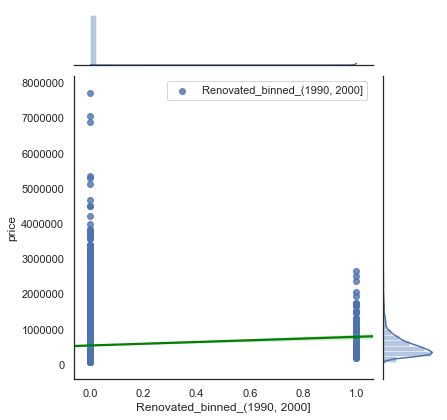

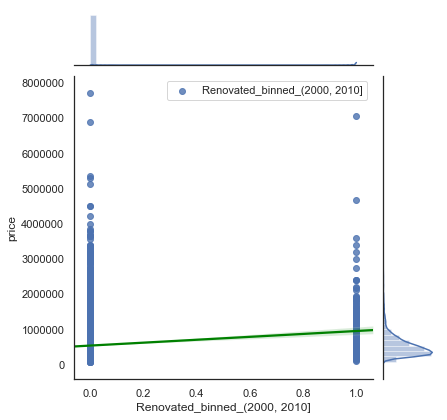

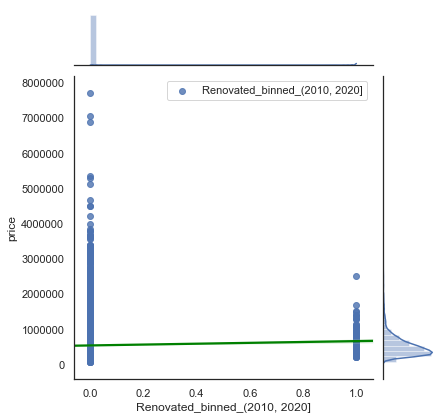

In [47]:
##paused to speed up run time
for column in data.columns:
    sns.jointplot(x=column, y="price", data=data, kind='reg', label=column, joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

At an initial glance, few predictors exhibit a linear relationship with the target variable. I'll move forward with the modeling stage.

___Build linear model___

I'll first use the statsmodel approach to model a linear relationship.

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
col_names = data.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept','slope', 'p-value']]
for idx, val in enumerate(col_names):
    print ("Kansas City Real Estate: price~" + val)
    print ("------------------------------")
    
    f = "price~" + val
    model = smf.ols(formula=f, data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]})
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx + 1])

Kansas City Real Estate: price~id
------------------------------
['id', 0.0002697668689333188, 550638.5237587796, -2.1140763812569305e-06, 0.030322153373274784]
Kansas City Real Estate: price~sqft_lot
------------------------------
['sqft_lot', 0.007422450776853107, 529412.832343277, 0.75387645734065, 5.1879636367521685e-30]
Kansas City Real Estate: price~sqft_above
------------------------------
['sqft_above', 0.36959712616326057, 53603.070617417776, 271.88494059919265, 0.0]
Kansas City Real Estate: price~sqft_basement
------------------------------
['sqft_basement', 0.12298724636145741, 359553.1010776579, 385.46261952795425, 0.0]
Kansas City Real Estate: price~sqft_living15
------------------------------
['sqft_living15', 0.343343262590601, -88675.5279791273, 316.27098930894203, 0.0]
Kansas City Real Estate: price~sqft_lot15
------------------------------
['sqft_lot15', 0.006807302274587146, 526722.7094505272, 1.107973974293615, 1.1820903393164722e-27]
Kansas City Real Estate: price~

SyntaxError: invalid syntax (<unknown>, line 1)

The decimal is causing an error. I'll need to address this ..

I'll also use another approach to model, Scikit-learn

In [50]:
data.dtypes

id                                 int64
price                            float64
sqft_lot                           int64
sqft_above                         int64
sqft_basement                    float64
sqft_living15                      int64
sqft_lot15                         int64
bedrooms_1                         uint8
bedrooms_10                        uint8
bedrooms_11                        uint8
bedrooms_2                         uint8
bedrooms_3                         uint8
bedrooms_33                        uint8
bedrooms_4                         uint8
bedrooms_5                         uint8
bedrooms_6                         uint8
bedrooms_7                         uint8
bedrooms_8                         uint8
bedrooms_9                         uint8
bathrooms_0.5                      uint8
bathrooms_0.75                     uint8
bathrooms_1.0                      uint8
bathrooms_1.25                     uint8
bathrooms_1.5                      uint8
bathrooms_1.75  

In [51]:
X= col_names
y=data["price"]

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [53]:
linreg = LinearRegression()

In [54]:
linreg.fit(X, y)

ValueError: could not convert string to float: 'id'

In [55]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
linreg.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [57]:
linreg.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [58]:
r_list = []
adj_r_list = []
list_n = list(range(5,175,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

ValueError: could not convert string to float: 'id'

The difference between the estimates are negligable, which is good. However we are likely overfitting with so many features.

I'll next use test-train-split to validate the model.

In [59]:
# X= col_names
# y=data["price"]

In [60]:
y = data[["price"]]
X = data.drop(["price"], axis=1)
X.head()

id  sqft_lot  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0  7129300520      5650        1180     292.924608           1340        5650   
1  6414100192      7242        2170     400.000000           1690        7639   
3  2487200875      5000        1050     910.000000           1360        5000   
4  1954400510      8080        1680     292.924608           1800        7503   
5  7237550310    101930        3890    1530.000000           4760      101930   

   bedrooms_1  bedrooms_10  bedrooms_11  bedrooms_2  \
0           0            0            0           0   
1           0            0            0           0   
3           0            0            0           0   
4           0            0            0           0   
5           0            0            0           0   

               ...                Renovated_binned_(1920, 1930]  \
0              ...                                            0   
1              ...                                            0   
3              ...                                            0   
4              ...                                            0   
5              ...                                            0   

   Renovated_binned_(1930, 1940]  Renovated_binned_(1940, 1950]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1950, 1960]  Renovated_binned_(1960, 1970]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1970, 1980]  Renovated_binned_(1980, 1990]  \
0                              0                              0   
1                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(1990, 2000]  Renovated_binned_(2000, 2010]  \
0                              0                              0   
1                              1                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   

   Renovated_binned_(2010, 2020]  
0                              0  
1                              0  
3                              0  
4                              0  
5                              0  

[5 rows x 171 columns]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(2,172,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    1.205140e+11
dtype: float64
price    1.186574e+11
dtype: float64
price    7.699676e+10
dtype: float64
price    7.847625e+10
dtype: float64
price    5.809155e+10
dtype: float64
price    5.812028e+10
dtype: float64
price    5.651466e+10
dtype: float64
price    5.658575e+10
dtype: float64
price    5.315437e+10
dtype: float64
price    6.063473e+10
dtype: float64
price    5.120785e+10
dtype: float64
price    5.919342e+10
dtype: float64
price    5.107288e+10
dtype: float64
price    2.823130e+31
dtype: float64
price    4.159446e+10
dtype: float64
price    4.218184e+31
dtype: float64
price    3.396565e+10
dtype: float64
price    1.304702e+30
dtype: float64
price    2.963934e+10
dtype: float64
price    3.015022e+22
dtype: float64
price    2.786496e+10
dtype: float64
price    2.079259e+30
dtype: float64
price    2.642991e+10
dtype: float64
price    3.461739e+29
dtype: float64
price    2.585165e+10
dtype: float64
price    9.886312e+28
dtype: float64
price    2.570783e+10
dtype: float64
p

The results above don't seem correct. I'll modify the parameters in another iteration.

__Finalize model__

__Conclusion__

We have a useful dataset that we can use to answer the questions presented above. However at the moment, the answers are inconclusive as we troubleshoot an issue encountered in the modeling stage. Some of these issues may also require additional pre-processing of the data set.